In [1]:
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from matplotlib import font_manager

font_name = font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()

plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

In [2]:
total = pd.read_csv('./data2/data_anal.csv')
#total['order_purchase_timestamp'] = pd.to_datetime(total.order_purchase_timestamp)
#total['order_aproved_at'] = pd.to_datetime(total.order_aproved_at)
#total['order_estimated_delivery_date'] = pd.to_datetime(total.order_estimated_delivery_date) 
#total['order_delivered_customer_date'] = pd.to_datetime(total.order_delivered_customer_date) 
#total['review_creation_date'] = pd.to_datetime(total.review_creation_date) 
#total['review_answer_timestamp'] = pd.to_datetime(total.review_answer_timestamp)

# 함수들
1. 데이터 테이블 구축
2. barplot 그리기
3. 꺾은선 그래프 그리기
4. 교차점 있는 꺾은선 그래프 그리기

## 1.1. 데이터 테이블
### - get_table(df, x, y, nbins, minimum, maximum)

In [3]:
def get_table(df,x,y,nbins,minimum,maximum):
    ## bin 생성
    bins = []
    
    if df[x].min() >= minimum:
        minimum = df[x].min()
    else:
        bins.append(df[x].min())
    
    maxo = round(maximum+round(((maximum-minimum)/nbins),3),3)
    [bins.append(i) for i in np.arange(minimum,maxo,round(((maximum-minimum)/nbins),3))]
    bins.append(df[x].max())
    
    print(bins)
    
    binsum = df.groupby(pd.cut(df[x], bins = bins)).size()
    
    
    
    pdf = df[df[y]=='Positive']
    pfreq = pdf.groupby(pd.cut(pdf[x], bins = bins)).size()
    pprop = pdf.groupby(pd.cut(pdf[x], bins = bins)).size()/binsum

    ndf = df[df[y]=='Negative']
    nfreq = ndf.groupby(pd.cut(ndf[x], bins = bins)).size()
    nprop = ndf.groupby(pd.cut(ndf[x], bins = bins)).size()/binsum

    ## x축 라벨 설정
    
    binsize = bins[2]-bins[1]
    
    labels= []
    if df[x].min() < minimum:
        labels.append('low_outlier')
    else:
        if abs(binsize//1) >= 1:
            labels.append('[' + str(int(bins[0])) +' , ' + str(int(bins[1])) + ']')
        else:
            rn = bins[2]//1+1
            labels.append('[' + str(round(bins[0],2)) +' , ' + str(round(bins[1],2)) + ']')
    if abs(binsize//1) >= 1:
        [labels.append('[' + str(int(bins[ind+1])) +' , ' + str(int(i)) + ']') for ind,i in enumerate(bins[2:-1])]
    else:
        [labels.append('[' + str(round(bins[ind+1],2)) +' , ' + str(round(i,2)) + ']') for ind,i in enumerate(bins[2:-1])]
    labels.append('high_outlier')
    print(labels)

    
    return_df = pd.DataFrame([nprop,pprop],index = ['Negative','Positive']).T
    return_df['bin_label'] = labels
    
    return_table = pd.DataFrame({'Frequency':binsum,'Positive' :pfreq,'Negative':nfreq})
    return_table[x] = labels
    return_table.set_index(x)
    
    
    return [return_df, return_table, nprop, pprop, bins]

## 1.2. 데이터 테이블 - bin 맘대로 조절
### - get_table2(df, x, y, temp_bins)

In [4]:
def get_table2(df,x,y,temp_bins):
    
    nbins = len(temp_bins)
    minimum = min(temp_bins)
    maximum = max(temp_bins)
    bins=[]
    if df[x].min() >= minimum:
        minimum = df[x].min()
    else:
        bins.append(df[x].min())
    [bins.append(i) for i in temp_bins]
#    maxo = round(maximum+round(((maximum-minimum)/nbins),3),3)
#    [bins.append(i) for i in np.arange(minimum,maxo,round(((maximum-minimum)/nbins),3))]
#    bins.append(maximum)
    bins.append(df[x].max())
    
    print(bins)
    
    binsum = df.groupby(pd.cut(df[x], bins = bins)).size()
    
    
    
    pdf = df[df[y]=='Positive']
    pfreq = pdf.groupby(pd.cut(pdf[x], bins = bins)).size()
    pprop = pdf.groupby(pd.cut(pdf[x], bins = bins)).size()/binsum

    ndf = df[df[y]=='Negative']
    nfreq = ndf.groupby(pd.cut(ndf[x], bins = bins)).size()
    nprop = ndf.groupby(pd.cut(ndf[x], bins = bins)).size()/binsum

    labels= []
    if df[x].min() < minimum:
        labels.append('low_outlier')
    else:
        labels.append('[' + str(round(bins[0],2)) +' , ' + str(round(bins[1],2)) + ']')
    
    [labels.append('[' + str(round(bins[ind+1],2)) +' , ' + str(round(i,2)) + ']') for ind,i in enumerate(bins[2:-1])]
    labels.append('high_outlier')
    print(labels)

    
    return_df = pd.DataFrame([nprop,pprop],index = ['Negative','Positive']).T
    return_df['bin_label'] = labels
    
    return_table = pd.DataFrame({'Frequency':binsum,'Positive' :pfreq,'Negative':nfreq})
    return_table[x] = labels
    return_table.set_index(x)
    
    
    return [return_df, return_table, nprop, pprop, bins]

## 2. 기초통계 막대 그래프 그리기
### - draw_freq(table,df,n,x,x_ko)

In [5]:
def draw_freq(table,df,n,x,x_ko):
    pal = sns.color_palette("Greens_d", len(table['Frequency']))
    rank = table['Frequency'].argsort().argsort()   

    sns.barplot(x= table.index,y = 'Frequency',data = table, palette=np.array(pal[::-1])[rank])
    xticks_pos = np.arange(len(table))

    plt.title('구간별 %s 빈도수'%x_ko)
    plt.xlabel(x_ko)
    plt.ylabel('빈도수')
    
    xt = plt.xticks(xticks_pos, df['bin_label'], rotation=45)

    plt.savefig('./상관관계/확정/%d. %s 기술통계.png'%(n,x_ko), bbox_inches='tight' )
    

## 3.1. 상관관계 막대 그래프 그리기 
### - draw_bar_cor(df, n, x, x_ko)

In [6]:
def draw_bar_cor(df,n,x,x_ko):
    
    ax = df.plot.bar(stacked=True, color=['red','blue'],alpha=0.5)
    plt.title('%s에 따른 평점 상관관계'%x_ko)
    plt.xlabel(x_ko)
    plt.ylabel('평점 비율')
    lab = ax.set_xticklabels(df['bin_label'], rotation=45)

    plt.savefig('./상관관계/확정/%d. %s에 따른 평점 상관관계_막대.png'%(n,x_ko), bbox_inches='tight')

## 3.2. 상관관계 꺾은선 그래프 그리기 
### - draw_line_cor(df, n, x, x_ko)

In [7]:
def draw_line_cor(df,n,x, x_ko):
    '''
    labels2 = []
    [labels2.append(i) for i in df['bin_label'].tolist()[0::2]]
    '''
    
    tick = [i for i in range(0,len(df),1)]
    if len(df) >= 10:
        labels2 = []
#        [labels2.append(i) for i in df['bin_label'].tolist()[0::2]]
        [labels2.append(i) if ind%2 == 0 else labels2.append('') for ind,i in enumerate(df['bin_label'].tolist())]
    else:
        labels2 = df['bin_label'].tolist()

    ax2 = df['Negative'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='red', linewidth=2)
    ax2 = df['Positive'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='blue', linewidth=2, alpha=0.3)
    ax2.grid(True)
#   ax2.scatter(num1-(bins[num1]-int_x)/6 ,int_y, marker= 'o', c='purple', s=50)
    
    lab = ax2.set_xticklabels(labels2, rotation=45)

    plt.title('%s에 따른 평점 상관관계'%x_ko)
    plt.xlabel(x_ko)
    plt.legend()
    plt.ylabel('평점 비율')
    
    ax2.set_xticks(tick)
    
    lab2 = ax2.set_xticklabels(labels2, rotation=45)
    
    plt.savefig('./상관관계/확정/%d. %s에 따른 평점 상관관계_꺾은선.png'%(n,x_ko),bbox_inches = 'tight')
    plt.show()
    
    ax3 = df['Negative'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='red', linewidth=2)
    ax3.grid(True)
    plt.title('%s에 따른 부정적 평점 비율'%x_ko)
    plt.xlabel(x_ko)
    plt.ylabel('평점 비율')

    ax3.set_ylim(0.1,round((df['Negative'].max()+0.1),2))

    ax3.set_xticks(tick)
    
    lab2 = ax3.set_xticklabels(labels2, rotation=45)
    
    plt.savefig('./상관관계/확정/%d. %s에 따른 부정적 평점 비율.png'%(n,x_ko),bbox_inches = 'tight')
    plt.show()

## 3.3. 상관관계 꺾은선 그래프 with 교차점 그리기

### 3.3.1. - 교차점 그리기

In [8]:
def line_intersection(num1, num2, nprop, pprop, bins):

    line1 = [[bins[num1],nprop.iloc[num1]], [bins[num2],nprop.iloc[num2]]]
    line2 = [[bins[num1],pprop.iloc[num1]], [bins[num2],pprop.iloc[num2]]]
    
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1]) #Typo was here

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    
    return x, y

### 3.3.2. - 교차점 & 꺾은선 그래프 그리기
### - draw_line_int_cor(df, bins, num1, int_x, n, x, x_ko)

In [9]:
import matplotlib.ticker as ticker

def draw_line_int_cor(df,bins,num1,int_x,n,x, x_ko):
    
        
    '''
    labels2 = [labels2.append(i) for i in df['bin_label'].tolist()[0::2]]
    labels2.insert(num1//2+1, round(int_x,2))'''
    
    ax2 = df['Negative'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='red', linewidth=2)
    ax2 = df['Positive'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='blue', linewidth=2, alpha=0.3)
    
    size_bin = bins[(num1+1)]-bins[num1]
    
    ax2.axvline(x = num1-(bins[num1]-int_x)/size_bin, ls= '--')
    
    ax2.scatter(num1-(bins[num1]-int_x)/size_bin ,int_y, marker= 'o', c='purple', s=50)
    ax2.grid(True)
    
    #ax2.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
    tick = [i for i in range(0,len(df),1)]
    tick.insert(num1//2+1,num1-(bins[num1]-int_x)/size_bin)

    ax2.set_xticks(tick)
    
    if len(df) >= 10:
        labels2 = []
#        [labels2.append(i) for i in df['bin_label'].tolist()[0::2]]
        [labels2.append(i) if ind%2 == 0 else labels2.append('') for ind,i in enumerate(df['bin_label'].tolist())]
        labels2.insert(num1//2+1, round(int_x,2))
    else:
        labels2 = df['bin_label'].tolist()
        labels2.insert(num1//2+1, round(int_x,2))
    
    lab = ax2.set_xticklabels(labels2, rotation=45)

    plt.title('%s에 따른 평점 상관관계'% x_ko)
    plt.xlabel(x_ko)
    plt.ylabel('평점 비율')
    plt.legend()
    plt.savefig('./상관관계/확정/%d. %s에 따른 평점 상관관계_꺾은선_교차점표시.png'%(n,x_ko),bbox_inches = 'tight')

## 4. 카테고리변수 일괄 함수
### - cat_all(df, x, y, n, x_ko)

In [10]:
def cat_all(df,x,y,n,x_ko):
    df_freq_table = pd.crosstab(index = df[x], columns= df[y], margins = True)
    
    df_prop_table = pd.crosstab(index = df[x], columns = df[y], margins = True).apply(lambda x : x/x['All'] , axis = 1).iloc[:-1,:-1]
    
    
    # df_prop_table = df_prop_table.sort_values('Negative',ascending=False)
    cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    
    if 'Monday' in df_freq_table.index:
        df_freq_table.index = pd.Categorical(df_freq_table.index, categories=cats, ordered=True)
        df_freq_table = df_freq_table.sort_index().iloc[1:,:]
        
        df_prop_table.index = pd.Categorical(df_prop_table.index, categories=cats, ordered=True)
        df_prop_table = df_prop_table.sort_index()
        
        df_prop_table2 = df_prop_table.sort_values('Negative',ascending=False)
        df_prop_table2.plot.bar(stacked=True, color=['red','blue'], alpha= .5)
        
        plt.title('%s에 따른 평점 상관관계'%x_ko)
        plt.xlabel(x_ko)
        plt.ylabel('평점 비율')
        plt.legend(loc=1)
        plt.savefig('./상관관계/확정/%d. %s(order) 따른 평점 상관관계_막대.png'%(n,x_ko),bbox_inches = 'tight')
        plt.show()
    elif 'Monday_time_1' in df_freq_table.index: 
        timecats = []
        for day in cats:
            for i in range(1,5):
                timecats.append(day+'_time_'+str(i))
        df_freq_table.index = pd.Categorical(df_freq_table.index, categories=timecats, ordered=True)
        df_freq_table = df_freq_table.sort_index().iloc[1:,:]
        df_prop_table.index = pd.Categorical(df_prop_table.index, categories=timecats, ordered=True)
        df_prop_table = df_prop_table.sort_index()
        df_prop_table2 = df_prop_table.sort_values('Negative',ascending=False)
        df_prop_table2.plot.bar(stacked=True, color=['red','blue'], alpha= .5)
        plt.title('%s에 따른 평점 상관관계'%x_ko)
        plt.legend(loc=1)
        plt.xlabel(x_ko)
        plt.ylabel('평점 비율')
        plt.savefig('./상관관계/확정/%d. %s(order) 따른 평점 상관관계_막대.png'%(n,x_ko),bbox_inches = 'tight')
        plt.show()
    
    pal = sns.color_palette("Greens_d", len(df_freq_table['All']))
    rank = df_freq_table['All'].argsort().argsort()   
    
    if 'All' in df_freq_table.index:
        sns.barplot(x= df_freq_table.index[:-1],y = df_freq_table['All'][:-1], data = df_freq_table, palette = np.array(pal[::-1])[rank])
    else:
        sns.barplot(x= df_freq_table.index,y = df_freq_table['All'], data = df_freq_table, palette = np.array(pal[::-1])[rank])

    plt.title('%s 빈도수'%x_ko)
    plt.xlabel(x_ko)
    plt.ylabel('빈도수')
    plt.xticks(rotation=90)
    plt.savefig('./상관관계/확정/%d. %s 기초통계.png'%(n,x_ko), bbox_inches='tight' )
    plt.show()
    
    
    df_prop_table.plot.bar(stacked=True, color=['red','blue'], alpha= .5)
    plt.legend(loc=1)
    plt.title('%s에 따른 평점 상관관계'%x_ko)
    plt.xlabel(x_ko)
    plt.ylabel('평점 비율')
    plt.savefig('./상관관계/확정/%d. %s 따른 평점 상관관계_막대.png'%(n,x_ko),bbox_inches = 'tight')
    plt.show()
    return [df_freq_table, df_prop_table]

# [가설1] del_period 절대적 배송 기간
가설 1. (판매자-고객 거리를 고려하지 않은) 절대적 배송기간이 짧을수록 평점은 높다.

In [48]:
del_period.describe()

,del_period
count,90705.000000
mean,12.843274
std,9.589223
min,0.533416
25%,7.011034
50%,10.653279
75%,15.951341
max,209.628622


In [13]:
del_period = total[['pn_review_score','del_period']]

[del_df, del_table, del_nprop, del_pprop, del_bins] = get_table(del_period,'del_period','pn_review_score',7, 0, 50)

[0.5334159988541667, 7.600415998854167, 14.667415998854167, 21.734415998854168, 28.801415998854168, 35.86841599885417, 42.93541599885417, 50.00241599885417, 209.6286219895486]
['[0 , 7]', '[7 , 14]', '[14 , 21]', '[21 , 28]', '[28 , 35]', '[35 , 42]', '[42 , 50]', 'high_outlier']


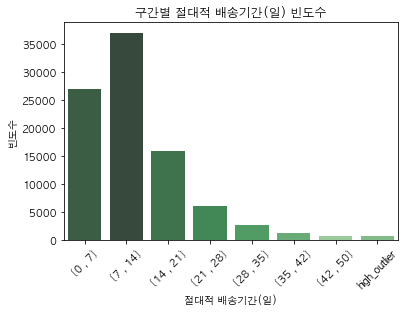

In [14]:
draw_freq(del_table, del_df, 1, 'del_period', '절대적 배송기간(일)')

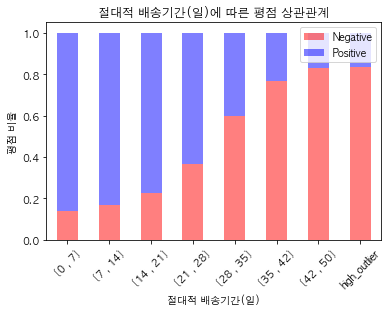

In [15]:
draw_bar_cor(del_df, 1,'del_period','절대적 배송기간(일)')

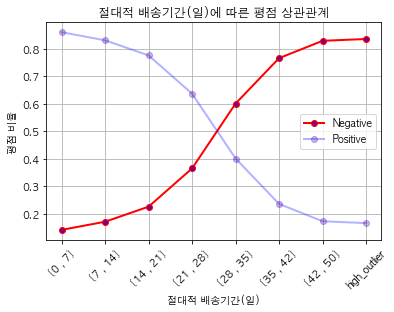

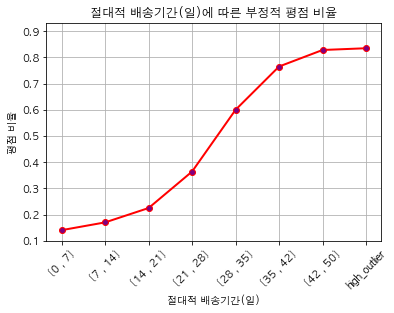

In [16]:
draw_line_cor(del_df,1,'del_period','절대적 배송기간(일)')

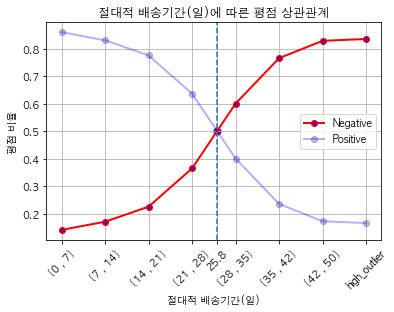

In [17]:
num1 = 3
num2 = 4
[int_x,int_y] = line_intersection(num1,num2, del_nprop,del_pprop,del_bins)

draw_line_int_cor(del_df,del_bins,num1,int_x,1,'del_period','절대적 배송기간(일)')

# [가설2] del_period_rel (판매자-고객 거리를 고려해 계산한)상대적 배송기간이 짧을수록 평점은 높다. 
del_period_rel = del_period/distance
> 먼저 파생변수부터 생성

### - [distance 0인것들 1로 바꾸기]

In [18]:
distance2 = []
for i in total['distance']:
    if i == 0 :
        distance2.append(1)
    else:
        distance2.append(i)
distance = distance2
total['distance'] = distance

In [19]:
distance = total['distance']
new = [x/y for x, y in zip(total['del_period'], distance)]

In [20]:
total['del_period_rel'] = new

In [21]:
total['del_period_rel'].describe()

count    90688.000000
mean         0.109500
std          0.682592
min          0.000739
25%          0.014700
50%          0.025309
75%          0.052292
max         67.863305
Name: del_period_rel, dtype: float64

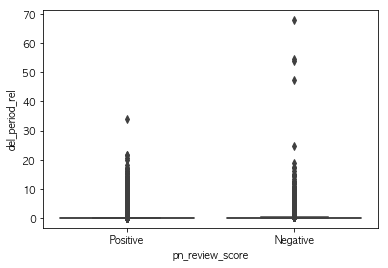

In [22]:
sns.boxplot(x='pn_review_score',y = 'del_period_rel',data=total)

### - 스케일링 필요해보임 --> log스케일링

In [39]:
new = [np.log10(x/y) for x, y in zip(total['del_period'], distance)]

In [40]:
total['del_period_rel'] = new

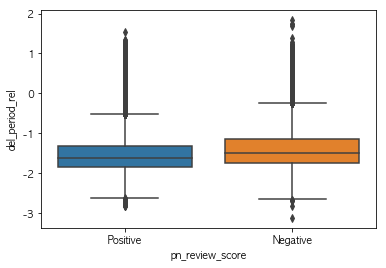

In [41]:
sns.boxplot(x='pn_review_score',y = 'del_period_rel',data=total)

In [42]:
total['del_period_rel'].describe()

count    90688.000000
mean        -1.499091
std          0.506900
min         -3.131196
25%         -1.832671
50%         -1.596718
75%         -1.281563
max          1.831635
Name: del_period_rel, dtype: float64

### - [가설 2. 본격적] del_period_rel 테이블 구하기

In [45]:
del_period_rel = total[['del_period_rel','pn_review_score']]
[rel_df, rel_table, rel_nprop, rel_pprop, rel_bins] = get_table(del_period_rel,'del_period_rel','pn_review_score',5,-2.5, 0)

[-3.1311957969507622, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 1.8316350052824057]
['low_outlier', '[-2.5 , -2.0]', '[-2.0 , -1.5]', '[-1.5 , -1.0]', '[-1.0 , -0.5]', '[-0.5 , 0.0]', 'high_outlier']


In [538]:
## [rel_df, rel_table, rel_nprop, rel_pprop, rel_bins] = get_table2(del_period_rel,'del_period_rel','pn_review_score',[0,0.015,0.025,0.05, 

[0, 0.01, 0.025, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.5, 1, 67.86330483622686]
['[0 , 0.01]', '[0.01 , 0.03]', '[0.03 , 0.05]', '[0.05 , 0.06]', '[0.06 , 0.07]', '[0.07 , 0.08]', '[0.08 , 0.09]', '[0.09 , 0.1]', '[0.1 , 0.5]', '[0.5 , 1]', 'high_outlier']


In [46]:
rel_df

,Negative,Positive,bin_label
del_period_rel,,,
"(-3.131, -2.5]",0.125000,0.875000,low_outlier
"(-2.5, -2.0]",0.151742,0.848258,"[-2.5 , -2.0]"
"(-2.0, -1.5]",0.185468,0.814532,"[-2.0 , -1.5]"
"(-1.5, -1.0]",0.264285,0.735715,"[-1.5 , -1.0]"
"(-1.0, -0.5]",0.262409,0.737591,"[-1.0 , -0.5]"
"(-0.5, 0.0]",0.249567,0.750433,"[-0.5 , 0.0]"
"(0.0, 1.832]",0.276984,0.723016,high_outlier


In [47]:
rel_table.set_index('del_period_rel')

,Frequency,Positive,Negative
del_period_rel,,,
low_outlier,152,133,19
"[-2.5 , -2.0]",10419,8838,1581
"[-2.0 , -1.5]",43269,35244,8025
"[-1.5 , -1.0]",24046,17691,6355
"[-1.0 , -0.5]",8079,5959,2120
"[-0.5 , 0.0]",3462,2598,864
high_outlier,1260,911,349


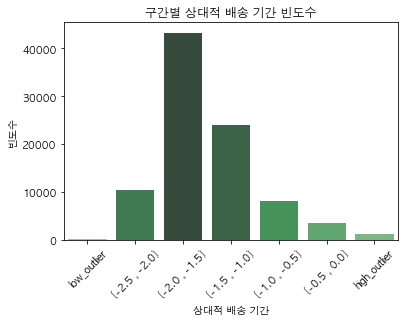

In [48]:
draw_freq(rel_table,rel_df,2,'del_period_rel','상대적 배송 기간')

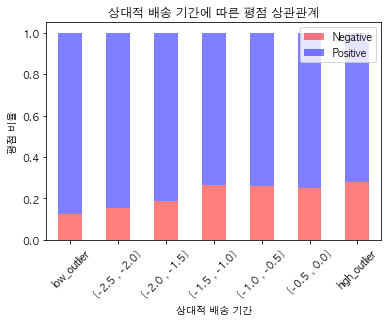

In [49]:
draw_bar_cor(rel_df,2,'del_period_rel','상대적 배송 기간')

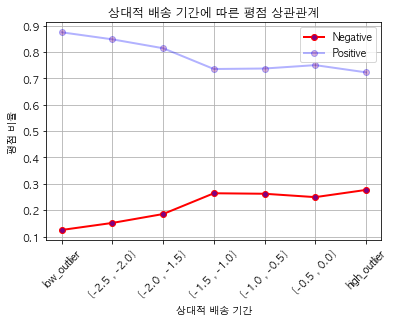

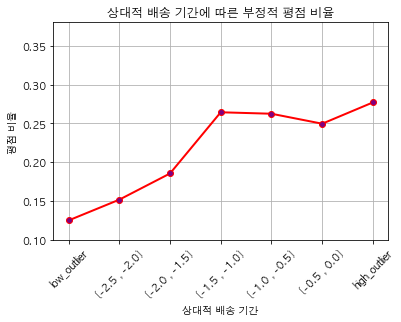

In [50]:
draw_line_cor(rel_df, 2, 'del_period_rel','상대적 배송 기간')

## <번외>- distance 기술통계

- 극남과 극북의 직선거리는 약 4,400km

In [51]:
total[total['distance'] !=0]['distance'].describe()

count    92983.000000
mean       603.118935
std        585.928594
min          1.000000
25%        205.935163
50%        437.817753
75%        792.311337
max       3508.077331
Name: distance, dtype: float64

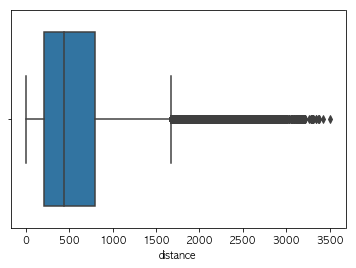

In [52]:
sns.boxplot('distance',data=total)

[1.0, 150.9, 300.8, 450.70000000000005, 600.6, 750.5, 900.4000000000001, 1050.3, 1200.2, 1350.1000000000001, 1500.0, 3508.0773309761585]
['[1 , 150]', '[150 , 300]', '[300 , 450]', '[450 , 600]', '[600 , 750]', '[750 , 900]', '[900 , 1050]', '[1050 , 1200]', '[1200 , 1350]', '[1350 , 1500]', 'high_outlier']


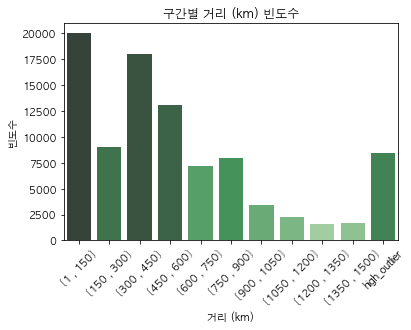

In [55]:
dist = total[['distance','pn_review_score']]
dist_df, dist_table, dist_nprop, dist_pprop, dist_bins = get_table(dist,'distance','pn_review_score',10,0,1500)

draw_freq(dist_table,dist_df,0,'distance','거리 (km)')

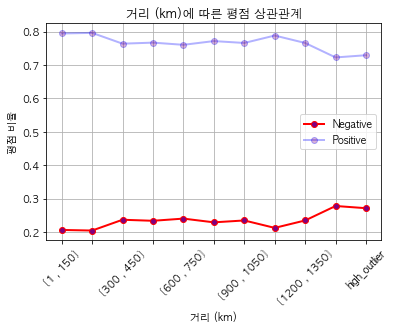

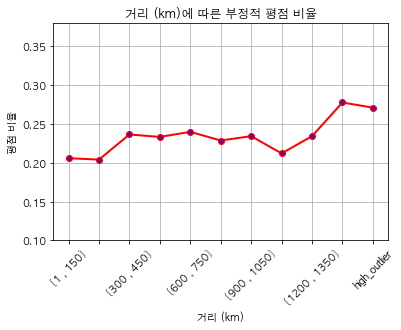

In [56]:
draw_line_cor(dist_df,0,'distance','거리 (km)')

# [가설3] del_period_psy 심리적 배송기간이 짧을수록(예상 배송일자보다 실제 배송일자가 빠를수록) 평점은 높다.  
order_estimated_delivery_date - order_delivered_customer_date

In [58]:
del_period_psy = total[['del_period_psy','pn_review_score']]

In [59]:

[psy_df, psy_table, psy_nprop, psy_pprop, psy_bins] = get_table(del_period_psy, 'del_period_psy','pn_review_score', 10, -35, 35)

[-188.97509230310183, -35.0, -28.0, -21.0, -14.0, -7.0, 0.0, 7.0, 14.0, 21.0, 28.0, 35.0, 146.01612236100698]
['low_outlier', '[-35 , -28]', '[-28 , -21]', '[-21 , -14]', '[-14 , -7]', '[-7 , 0]', '[0 , 7]', '[7 , 14]', '[14 , 21]', '[21 , 28]', '[28 , 35]', 'high_outlier']


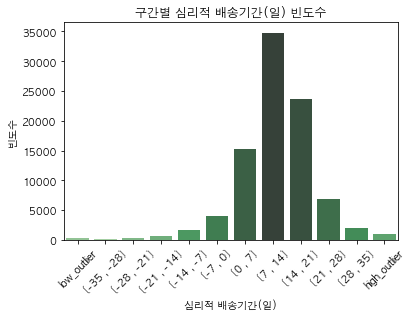

In [60]:
draw_freq(psy_table, psy_df, 3, 'del_period_psy', '심리적 배송기간(일)')

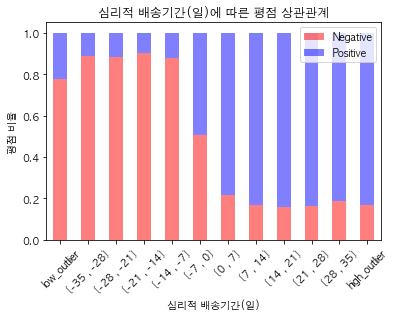

In [61]:
draw_bar_cor(psy_df, 3,'del_period_psy', '심리적 배송기간(일)')

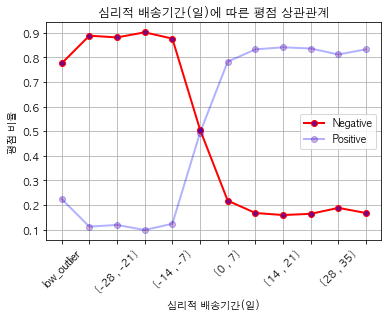

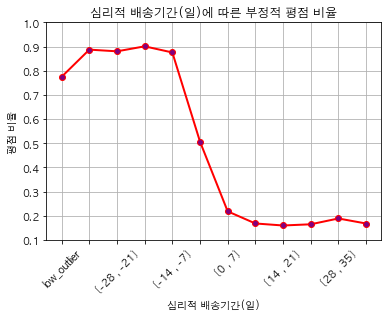

In [62]:
draw_line_cor(psy_df, 3,'del_period_psy', '심리적 배송기간(일)')

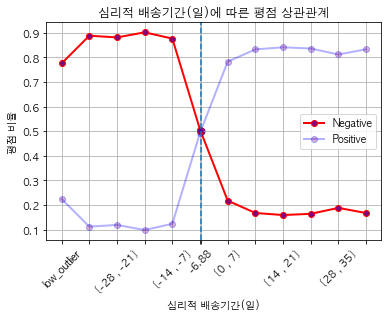

In [248]:
num1 = 4
num2 = 5
[int_x, int_y] =line_intersection(num1, num2, psy_nprop, psy_pprop, psy_bins)

draw_line_int_cor(psy_df, psy_bins, num1, int_x,3,'del_period_psy', '심리적 배송기간(일)')

# [가설4] del_period_deadline_yn 예상일을 초과해서 배송한 경우 FALSE 예상일 내에 배송한 경우 TRUE
FALSE인 경우, 즉 예상일을 초과하여 배송한 경우 평점은 낮다.

In [65]:
dead = total[['del_period_deadline_yn','pn_review_score']]

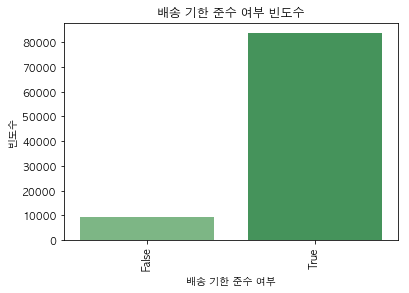

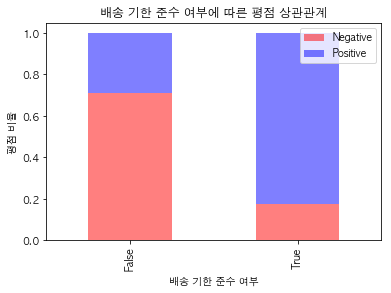

In [66]:
[dead_freq_table, dead_prop_table]= cat_all(dead,'del_period_deadline_yn','pn_review_score',4,'배송 기한 준수 여부')

In [67]:
dead_table = pd.crosstab(columns = dead['del_period_deadline_yn'],index= dead['pn_review_score'],margins=True)

In [414]:
dead_prop_table = round(dead_table/dead_table.loc['All'],3)
dead_prop_table = dead_prop_table.iloc[:-1, :-1]
dead_prop_table

del_period_deadline_yn,False,True
pn_review_score,,
Negative,0.712,0.175
Positive,0.288,0.825


# [가설9] order_time_6 

-  주문시간대와 리뷰평점은 관련이 있을 것이다

In [68]:
od_time = total[['order_time_6','pn_review_score']]

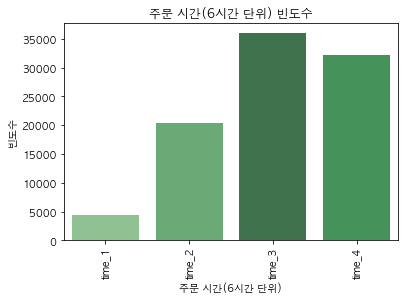

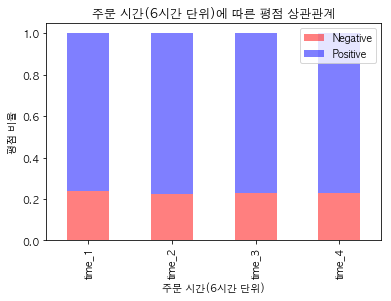

In [69]:
[od_time_freq_table, od_time_prop_table] = cat_all(od_time,'order_time_6','pn_review_score',9,'주문 시간(6시간 단위)')

In [447]:
od_time_table = pd.crosstab(index = od_time.order_time_6, columns = od_time.pn_review_score, margins=True)
od_time_table.index = ['time1 (0-6)','time2 (6-12)','time3 (12-18)','time4 (18-24)', 'All']
od_time_table

pn_review_score,Negative,Positive,All
time1 (0-6),1069,3370,4439
time2 (6-12),4552,15852,20404
time3 (12-18),8310,27658,35968
time4 (18-24),7345,24844,32189
All,21276,71724,93000


In [452]:
od_time_prop_table = pd.crosstab(index = od_time.order_time_6, columns = od_time.pn_review_score, margins=True).apply(lambda x : x/x['All'] , axis = 1).iloc[:-1,:-1]

od_time_prop_table

pn_review_score,Negative,Positive
order_time_6,,
time_1,0.240820,0.759180
time_2,0.223094,0.776906
time_3,0.231039,0.768961
time_4,0.228184,0.771816


# [가설10] oder_day 주문 요일 

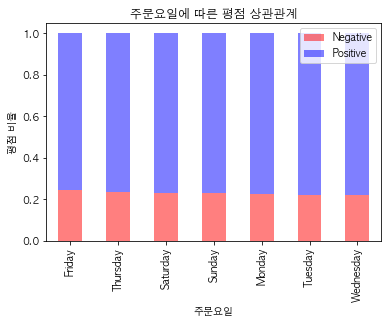

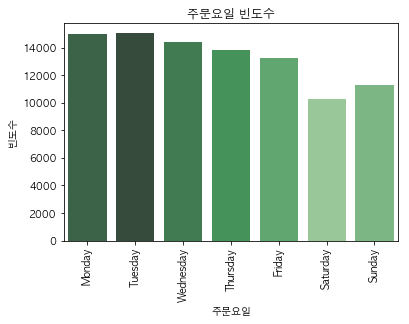

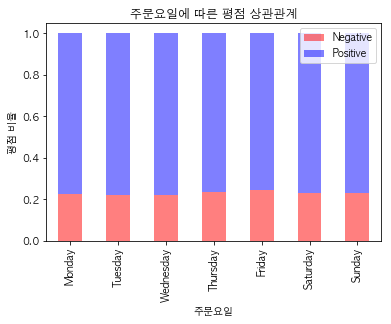

In [70]:
od_day = total[['order_day','pn_review_score']]


[oday_freq_table, oday_prop_table] = cat_all(od_day, 'order_day','pn_review_score' , 10, '주문요일')

# [가설11] order_week_day_end 주문평일주말

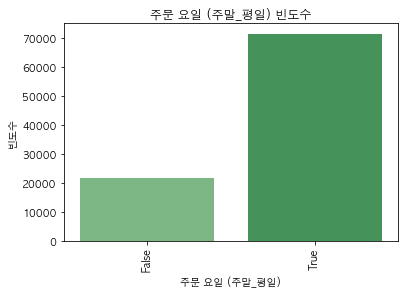

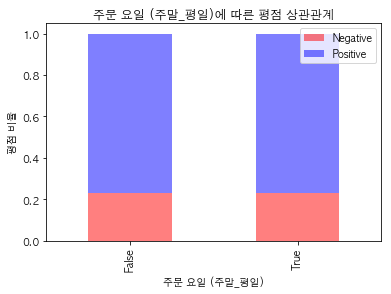

In [72]:
[owd_freq_table, owd_prop_table] = cat_all(total[['order_week_day_end','pn_review_score']], 'order_week_day_end', 'pn_review_score', 11,'주문 요일 (주말_평일)')


In [487]:
owd_freq_table

pn_review_score,Negative,Positive,All
order_week_day_end,,,
False,4965,16651,21616
True,16311,55073,71384
All,21276,71724,93000


# [가설 12] order_day_time_6 

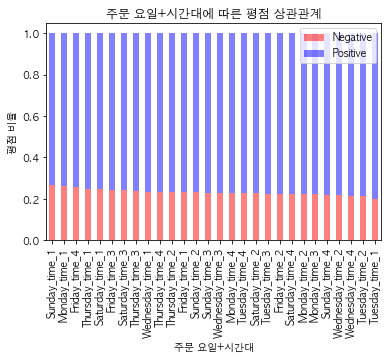

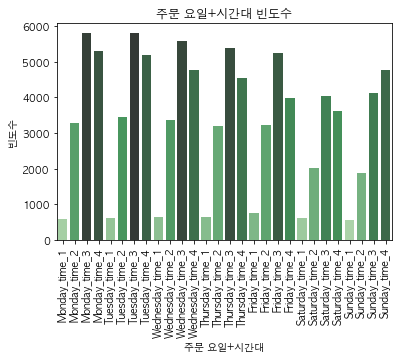

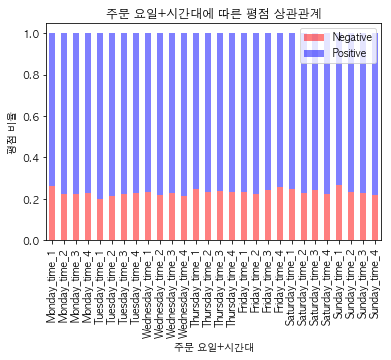

In [73]:
[daytime_freq_table, daytime_prop_table] = cat_all(total[['order_day_time_6','pn_review_score']],'order_day_time_6','pn_review_score', 12,'주문 요일+시간대')

In [500]:

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
timecats = []
for day in cats:
    for i in range(1,5):
        timecats.append(day+'_time_'+str(i))


daytime_freq_table.index = pd.Categorical(daytime_freq_table.index, categories=timecats, ordered=True)

In [512]:
daytime_freq_table.sort_index().iloc[1:,:]

pn_review_score,Negative,Positive,All
Monday_time_1,155,437,592
Monday_time_2,731,2545,3276
Monday_time_3,1285,4510,5795
Monday_time_4,1199,4104,5303
Tuesday_time_1,122,490,612
Tuesday_time_2,732,2706,3438
Tuesday_time_3,1300,4499,5799
Tuesday_time_4,1168,4007,5175
Wednesday_time_1,154,502,656
Wednesday_time_2,730,2636,3366


# [가설18] order_ans_time_6 리뷰작성 시간대

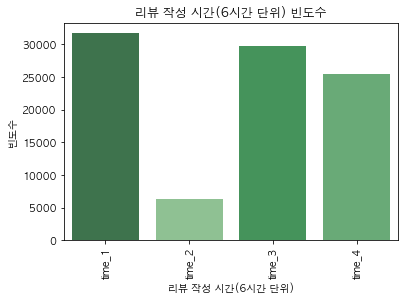

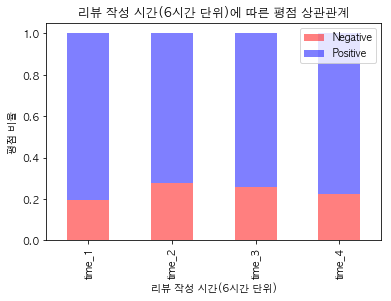

In [74]:
[astime_freq_table, astime_prop_table] = cat_all(total[['review_ans_time_6','pn_review_score']], 'review_ans_time_6','pn_review_score',18,'리뷰 작성 시간(6시간 단위)')

In [523]:
astime_freq_table.index = ['time1 (0-6)','time2 (6-12)','time3 (12-18)','time4 (18-24)','All']
astime_freq_table

pn_review_score,Negative,Positive,All
time1 (0-6),6173,25469,31642
time2 (6-12),1734,4548,6282
time3 (12-18),7676,22039,29715
time4 (18-24),5693,19668,25361
All,21276,71724,93000


# [가설19] review_ans_day

In [67]:
anday_freq_table

pn_review_score,Negative,Positive,All
Monday,3255,10763,14018
Tuesday,2358,7570,9928
Wednesday,3196,11200,14396
Thursday,3358,10985,14343
Friday,3608,12550,16158
Saturday,2757,9533,12290
Sunday,2744,9123,11867


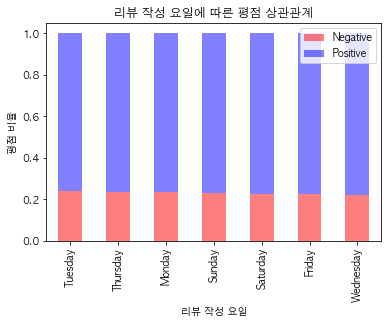

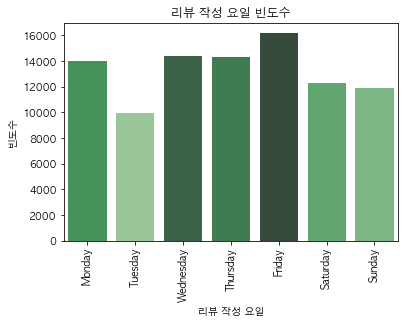

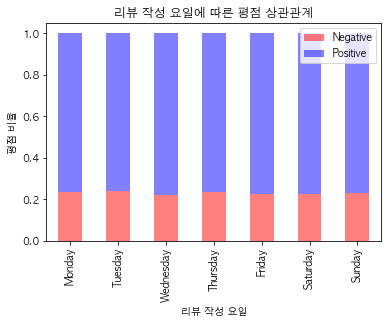

In [75]:
[anday_freq_table,anday_prop_table] = cat_all(total[['review_ans_day','pn_review_score']],'review_ans_day','pn_review_score',19, '리뷰 작성 요일')

In [29]:
anday_freq_table

pn_review_score,Negative,Positive,All
Monday,3255,10763,14018
Tuesday,2358,7570,9928
Wednesday,3196,11200,14396
Thursday,3358,10985,14343
Friday,3608,12550,16158
Saturday,2757,9533,12290
Sunday,2744,9123,11867


# [가설 20] review_ans_w_d_e, 리뷰작성평일주말

In [57]:
anwd_freq_table

pn_review_score,Negative,Positive,All
review_ans_w_d_e,,,
False,5501,18656,24157
True,15775,53068,68843
All,21276,71724,93000


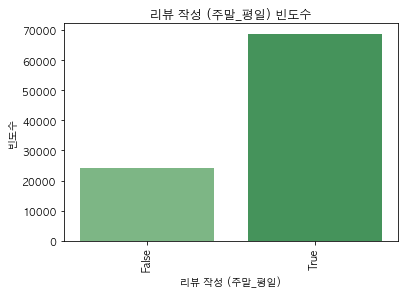

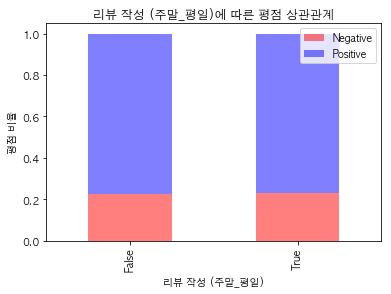

In [76]:
[anwd_freq_table,anwd_prop_table] = cat_all(total[['review_ans_w_d_e','pn_review_score']],'review_ans_w_d_e','pn_review_score',20, '리뷰 작성 (주말_평일)')

pn_review_score,Negative,Positive,All
review_ans_w_d_e,,,
False,5501,18656,24157
True,15775,53068,68843
All,21276,71724,93000


# [가설 21] order_product_value : 제품가격

In [77]:
product = total[['order_product_value','pn_review_score']]

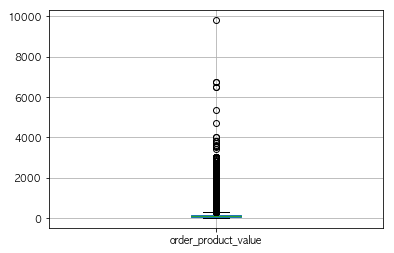

In [187]:
product.boxplot()

In [208]:
product.describe()

,order_product_value
count,93000.000000
mean,123.609105
std,179.571228
min,2.000000
25%,45.000000
50%,79.900000
75%,139.900000
max,9798.000000


In [78]:
[pro_df,pro_table, pro_nprop, pro_pprop, pro_bins] = get_table2(product,'order_product_value','pn_review_score',[0,30,100,170,300,1700])

[0, 30, 100, 170, 300, 1700, 9798.0]
['[0 , 30]', '[30 , 100]', '[100 , 170]', '[170 , 300]', '[300 , 1700]', 'high_outlier']


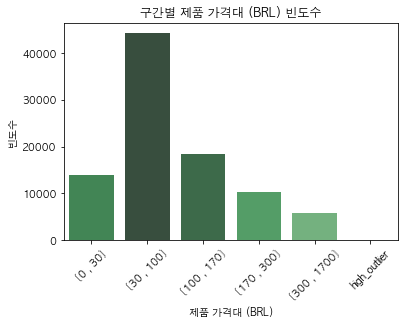

In [79]:
draw_freq(pro_table, pro_df, 21, 'order_product_value','제품 가격대 (BRL)')

In [357]:
pro_table

,Frequency,Positive,Negative,order_product_value
order_product_value,,,,
"(0.0, 30.0]",14031,10877,3154,"[0 , 30]"
"(30.0, 100.0]",44145,33925,10220,"[30 , 100]"
"(100.0, 170.0]",18405,14206,4199,"[100 , 170]"
"(170.0, 300.0]",10365,8014,2351,"[170 , 300]"
"(300.0, 1700.0]",5905,4602,1303,"[300 , 1700]"
"(1700.0, 9798.0]",149,100,49,high_outlier


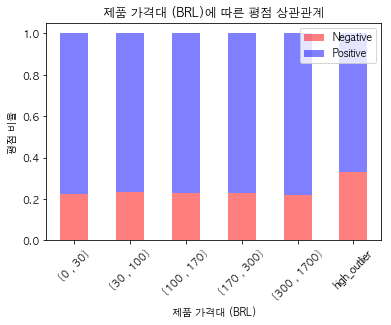

In [80]:
draw_bar_cor(pro_df, 21, 'order_product_value','제품 가격대 (BRL)')

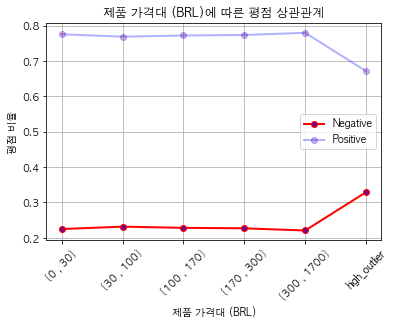

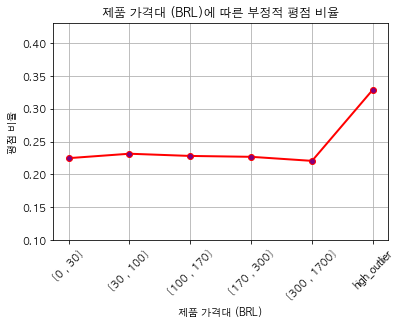

In [81]:
draw_line_cor(pro_df, 21,'order_product_value','제품 가격대 (BRL)')

# [가설23] payment_voucher_yn 쿠폰 사용 유무

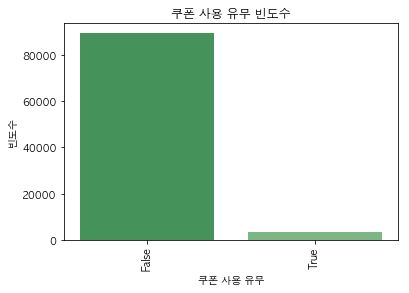

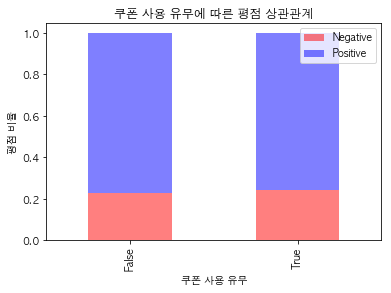

In [82]:
[vo_freq_table, vo_prop_table] = cat_all(total[['payment_voucher_yn','pn_review_score']], 'payment_voucher_yn','pn_review_score',23,'쿠폰 사용 유무') 

# [가설24] order_freight_value 배송료

In [84]:
freight = total[['order_freight_value','pn_review_score']]
freight.describe()

,order_freight_value
count,93000.000000
mean,21.877264
std,20.121699
min,0.000000
25%,13.640000
50%,16.790000
75%,23.070000
max,1562.100000


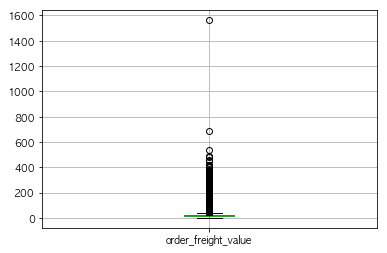

In [85]:
freight.boxplot()

In [86]:
[fr_df, fr_table, fr_nprop, fr_pprop, fr_bins] = get_table(freight, 'order_freight_value','pn_review_score', 5,0, 50)

[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 1562.1]
['[0 , 10]', '[10 , 20]', '[20 , 30]', '[30 , 40]', '[40 , 50]', 'high_outlier']


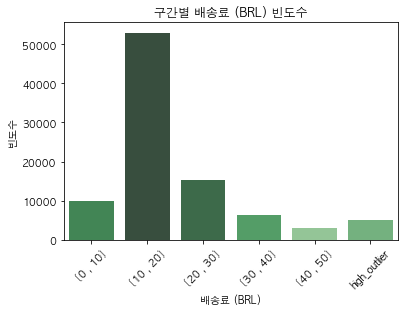

In [87]:
draw_freq(fr_table, fr_df, 24, 'order_freight_value', '배송료 (BRL)')

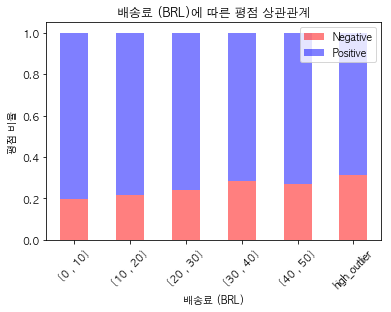

In [88]:
draw_bar_cor(fr_df, 24, 'order_freight_value', '배송료 (BRL)')


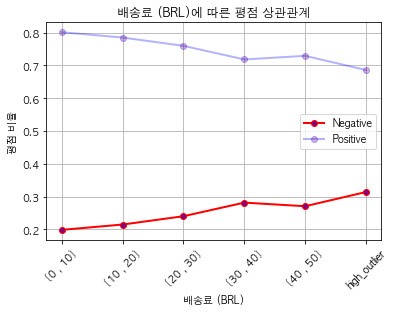

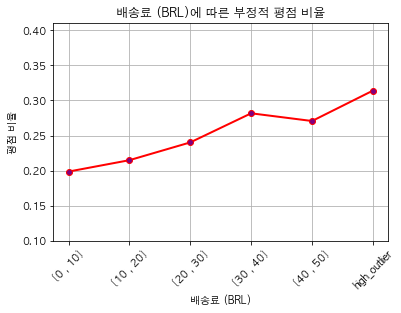

In [89]:

draw_line_cor(fr_df, 24, 'order_freight_value', '배송료 (BRL)')

# [가설25] freight_value_proportion 배송료 비중 (BRL)

In [90]:
prop_freight = total[['freight_value_proportion','pn_review_score']]

prop_freight.describe()

,freight_value_proportion
count,93000.000000
mean,0.298195
std,0.289720
min,0.000000
25%,0.130000
50%,0.219523
75%,0.364615
max,12.244444


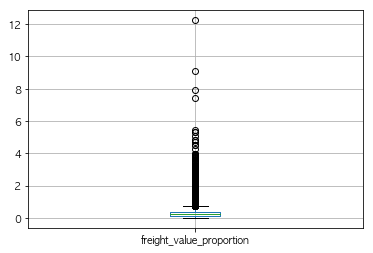

In [91]:
prop_freight.boxplot()

In [138]:
[fp_df, fp_table, fp_nprop, fp_pprop, fp_bins] = get_table2(prop_freight, 'freight_value_proportion','pn_review_score', [0, 0.05, 0.1,0.2,0.3,0.4,0.6,0.8,1])

[0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1, 12.244444444444444]
['[0 , 0.05]', '[0.05 , 0.1]', '[0.1 , 0.2]', '[0.2 , 0.3]', '[0.3 , 0.4]', '[0.4 , 0.6]', '[0.6 , 0.8]', '[0.8 , 1]', 'high_outlier']


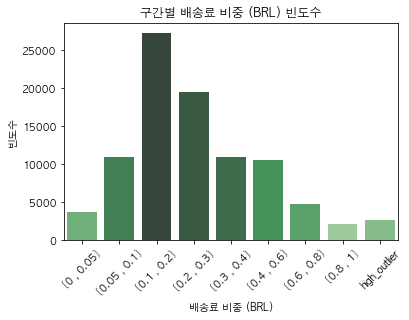

In [139]:
draw_freq(fp_table, fp_df, 25, 'freight_value_proportion', '배송료 비중 (BRL)')

In [142]:
fp_table

,Frequency,Positive,Negative,freight_value_proportion
freight_value_proportion,,,,
"(0.0, 0.05]",3750,2948,802,"[0 , 0.05]"
"(0.05, 0.1]",10976,8608,2368,"[0.05 , 0.1]"
"(0.1, 0.2]",27227,21117,6110,"[0.1 , 0.2]"
"(0.2, 0.3]",19478,15053,4425,"[0.2 , 0.3]"
"(0.3, 0.4]",10983,8367,2616,"[0.3 , 0.4]"
"(0.4, 0.6]",10536,7991,2545,"[0.4 , 0.6]"
"(0.6, 0.8]",4804,3673,1131,"[0.6 , 0.8]"
"(0.8, 1.0]",2077,1587,490,"[0.8 , 1]"
"(1.0, 12.244]",2630,1930,700,high_outlier


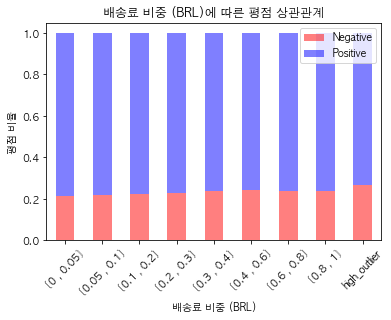

In [141]:
draw_bar_cor( fp_df, 25, 'freight_value_proportion', '배송료 비중 (BRL)')


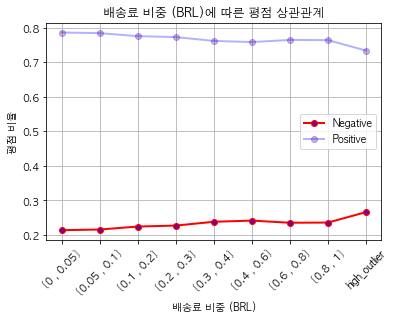

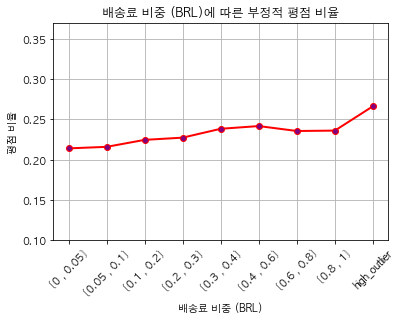

In [140]:
draw_line_cor( fp_df, 25, 'freight_value_proportion', '배송료 비중 (BRL)')

# [가설26] installments_yn 할부 여부

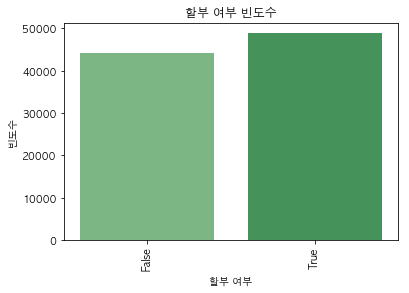

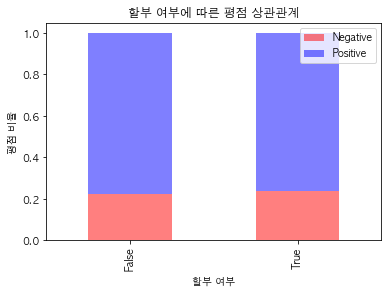

In [143]:
[iyn_freq_table, _prop_table] = cat_all(total[['installments_yn','pn_review_score']], 'installments_yn','pn_review_score', 26, '할부 여부')

# [가설27] sim_installments_mean 단순 할부 평균 (개월)

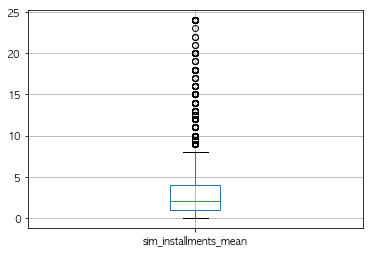

In [146]:
total[['sim_installments_mean','pn_review_score']].boxplot()

In [155]:
[sim_df, sim_table, sim_nprop, sim_pprop, sim_bins] = get_table2(total[['sim_installments_mean','pn_review_score']], 'sim_installments_mean','pn_review_score', [0,1,3,6,9,12])

[0, 1, 3, 6, 9, 12, 24.0]
['[0 , 1]', '[1 , 3]', '[3 , 6]', '[6 , 9]', '[9 , 12]', 'high_outlier']


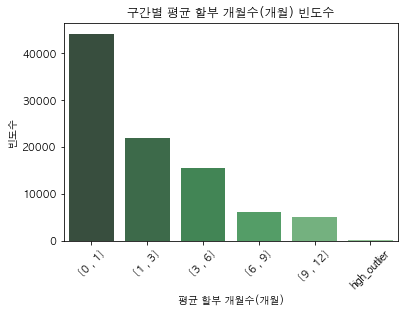

In [157]:
draw_freq(sim_table, sim_df, 27, 'sim_installments_mean', '평균 할부 개월수(개월)')

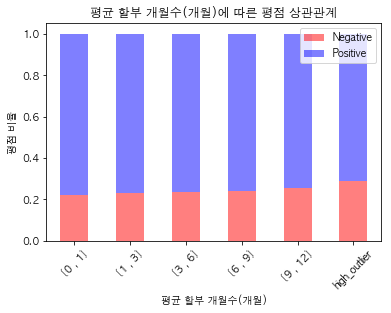

In [159]:
draw_bar_cor(sim_df, 27, 'sim_installments_mean', '평균 할부 개월수(개월)')

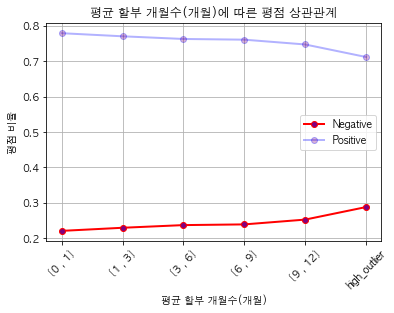

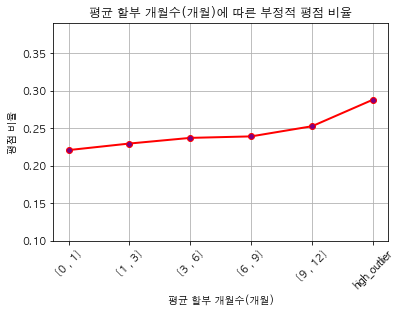

In [160]:
draw_line_cor(sim_df,27, 'sim_installments_mean', '평균 할부 개월수(개월)')

# [가설28] wgt_installments_mean 가중 평균 할부 개월수(개월)

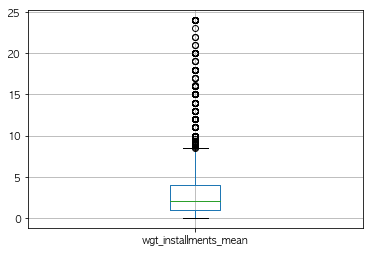

In [161]:
total[['wgt_installments_mean','pn_review_score']].boxplot()

In [162]:
[wgt_df, wgt_table, wgt_nprop, wgt_pprop, wgt_bins] = get_table2(total[['wgt_installments_mean','pn_review_score']], 'wgt_installments_mean','pn_review_score', [0,1,3,6,9,12])

[0, 1, 3, 6, 9, 12, 24.000000000000004]
['[0 , 1]', '[1 , 3]', '[3 , 6]', '[6 , 9]', '[9 , 12]', 'high_outlier']


In [166]:
wgt_table

,Frequency,Positive,Negative,wgt_installments_mean
wgt_installments_mean,,,,
"(0.0, 1.0]",42616,33252,9364,"[0 , 1]"
"(1.0, 3.0]",21178,16321,4857,"[1 , 3]"
"(3.0, 6.0]",15847,12083,3764,"[3 , 6]"
"(6.0, 9.0]",6459,4930,1529,"[6 , 9]"
"(9.0, 12.0]",5206,3883,1323,"[9 , 12]"
"(12.0, 24.0]",188,134,54,high_outlier


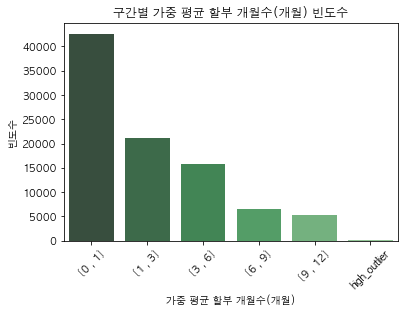

In [163]:
draw_freq(wgt_table, wgt_df, 28, 'wgt_installments_mean', '가중 평균 할부 개월수(개월)')

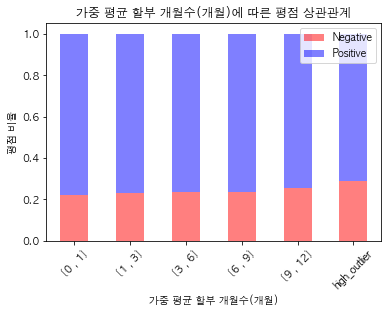

In [164]:
draw_bar_cor(wgt_df, 28, 'wgt_installments_mean', '가중 평균 할부 개월수(개월)')

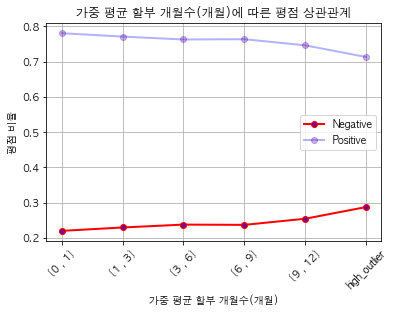

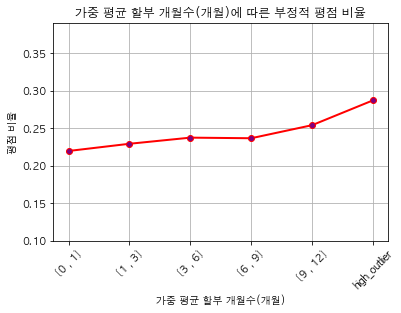

In [165]:
draw_line_cor(wgt_df, 28, 'wgt_installments_mean', '가중 평균 할부 개월수(개월)')

# [가설30] 카테고리별 eda

In [519]:
cat = total[['product_category_name_english','pn_review_score']]
freq_table = pd.crosstab(index = cat.product_category_name_english, columns = cat.pn_review_score, margins=True).apply(lambda x : x , axis = 1)
cat_table = pd.crosstab(index = cat.product_category_name_english, columns = cat.pn_review_score, margins=True).apply(lambda x : x/x['All'] , axis = 1)

In [520]:
freq = cat_table.iloc[:-1,:-1].T

In [521]:
df = cat_table.iloc[:-1,:-1].sort_values('Negative',ascending=False)

In [522]:
freq_table.head()

pn_review_score,Negative,Positive,All
product_category_name_english,,,
agro_industry_and_commerce,20,98,118
air_conditioning,66,164,230
art,8,76,84
arts_and_craftmanship,3,2,5
audio,51,141,192


In [523]:
y_ratio = sum(total['pn_review_score'] == 'Positive') / len(total)

In [524]:
df2 = df.merge(freq_table, on ='product_category_name_english').sort_values('Negative_x',ascending=False)

In [525]:
df2.columns

Index(['Negative_x', 'Positive_x', 'Negative_y', 'Positive_y', 'All'], dtype='object', name='pn_review_score')

In [526]:
cut_df = df2[df2['All']>= 50][['Negative_x','Positive_x']]
cut_df.columns=['Negative','Positive']

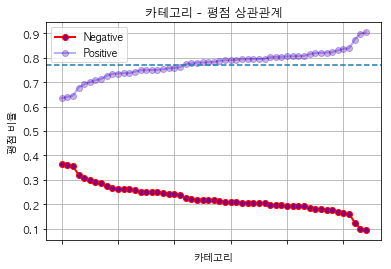

In [536]:
import matplotlib.ticker as ticker
ax2 = cut_df['Negative'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='red', linewidth=2)
ax2 = cut_df['Positive'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='blue', linewidth=2, alpha=0.3)

ax2.axhline(y=y_ratio, ls= '--')
#ax2.scatter(num1-abs(int_x)/6 ,int_y, marker= 'o', c='purple', s=100)
ax2.grid(True)
#ax2.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

#ax2.set_xticks([0,2,4,int_x/5,6,8,10])
#ax2.set_yticks()

#ax2.set_xticklabels(labels2,rotation = 45)
ax2.legend()
plt.title('카테고리 - 평점 상관관계')
plt.xlabel('카테고리')
plt.ylabel('평점 비율')
plt.savefig('./상관관계/0. 카테고리 - 평점 상관관계_전체.png', bbox_inches='tight')

In [537]:
df2.head()

pn_review_score,Negative_x,Positive_x,Negative_y,Positive_y,All
product_category_name_english,,,,,
arts_and_craftmanship,0.600000,0.400000,3,2,5
flowers,0.500000,0.500000,5,5,10
security_and_services,0.500000,0.500000,1,1,2
small_appliances_home_oven_and_coffee,0.380952,0.619048,8,13,21
furniture_mattress_and_upholstery,0.370370,0.629630,10,17,27


In [535]:
df2.sort_values('Negative_x',ascending=False)

pn_review_score,Negative_x,Positive_x,Negative_y,Positive_y,All
product_category_name_english,,,,,
arts_and_craftmanship,0.600000,0.400000,3,2,5
flowers,0.500000,0.500000,5,5,10
security_and_services,0.500000,0.500000,1,1,2
small_appliances_home_oven_and_coffee,0.380952,0.619048,8,13,21
furniture_mattress_and_upholstery,0.370370,0.629630,10,17,27
office_furniture,0.365869,0.634131,581,1007,1588
fashio_female_clothing,0.360000,0.640000,18,32,50
signaling_and_security,0.355263,0.644737,27,49,76
party_supplies,0.352941,0.647059,6,11,17


In [538]:
cut_df2 = cut_df[cut_df['Positive'] < y_ratio]

In [539]:
cut_df2.head()

,Negative,Positive
product_category_name_english,,
office_furniture,0.365869,0.634131
fashio_female_clothing,0.360000,0.640000
signaling_and_security,0.355263,0.644737
home_confort,0.321792,0.678208
fashion_male_clothing,0.308333,0.691667


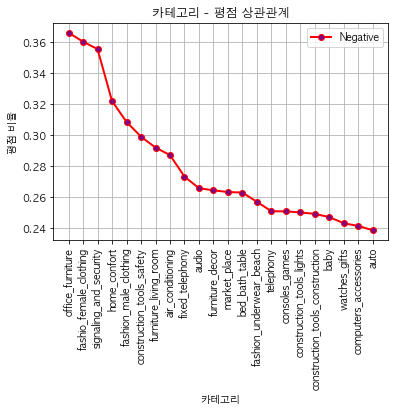

In [540]:
import matplotlib.ticker as ticker
ax2 = cut_df2['Negative'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='red', linewidth=2)
#ax2 = cut_df2['Positive'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='blue', linewidth=2, alpha=0.3)

ax2.grid(True)
ax2.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

ax2.legend()

ax2.set_xticklabels(cut_df2.index,rotation=90)

plt.title('카테고리 - 평점 상관관계')
plt.xlabel('카테고리')
plt.ylabel('평점 비율')
plt.savefig('./상관관계/0. 카테고리 - 평점 상관관계.png', bbox_inches='tight')

### deadline과 카테고리의 상관성 보기

In [549]:
cat = total[['product_category_name_english','del_period_deadline_yn']]
freq_table = pd.crosstab(index = cat.product_category_name_english, columns = cat.del_period_deadline_yn, margins=True).apply(lambda x : x , axis = 1)
cat_table = pd.crosstab(index = cat.product_category_name_english, columns = cat.del_period_deadline_yn, margins=True).apply(lambda x : x/x['All'] , axis = 1)

In [550]:
freq = cat_table.iloc[:-1,:-1].T

In [551]:
df = cat_table.iloc[:-1,:-1].sort_values(False,ascending=False)

In [552]:
y_ratio = sum(total['del_period_deadline_yn'] == True) / len(total)

In [553]:
df2 = df.merge(freq_table, on ='product_category_name_english').sort_values('False_x',ascending=False)

In [554]:
cut_df = df2[df2['All']>= 50][['False_x','True_x']]
cut_df.columns=['False','True']

In [555]:
df.columns

Index([False, True], dtype='object', name='del_period_deadline_yn')

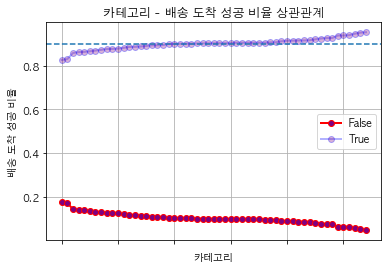

In [556]:
import matplotlib.ticker as ticker
ax2 = cut_df['False'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='red', linewidth=2)
ax2 = cut_df['True'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='blue', linewidth=2, alpha=0.3)
ax2.axhline(y=y_ratio, ls= '--')
#ax2.scatter(num1-abs(int_x)/6 ,int_y, marker= 'o', c='purple', s=100)
ax2.grid(True)
#ax2.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

#ax2.set_xticks([0,2,4,int_x/5,6,8,10])
#ax2.set_yticks()
ax2.legend()
#ax2.set_xticklabels(labels2,rotation = 45)

plt.title('카테고리 - 배송 도착 성공 비율 상관관계')
plt.xlabel('카테고리')
plt.ylabel('배송 도착 성공 비율')
plt.savefig('./상관관계/0.카테고리 - 배송 도착 성공 비율 상관관계_전체.png', bbox_inches='tight')



In [557]:
cut_df2 = cut_df[cut_df['True'] < y_ratio]

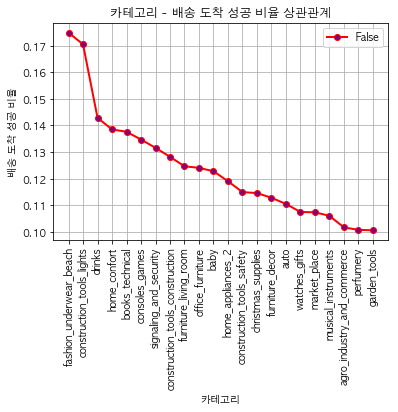

In [558]:
import matplotlib.ticker as ticker
ax2 = cut_df2['False'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='red', linewidth=2)
#ax2 = cut_df2['Positive'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='blue', linewidth=2, alpha=0.3)

#ax2.axhline(y=y_ratio, ls= '--')
#ax2.scatter(num1-abs(int_x)/6 ,int_y, marker= 'o', c='purple', s=100)
ax2.grid(True)
ax2.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

#ax2.set_xticks(cut_df2.index)
#ax2.set_yticks()
ax2.legend()
ax2.set_xticklabels(cut_df2.index,rotation=90)

plt.title('카테고리 - 배송 도착 성공 비율 상관관계')
plt.xlabel('카테고리')
plt.ylabel('배송 도착 성공 비율')
plt.savefig('./상관관계/0.카테고리 - 배송 도착 성공 비율 상관관계.png', bbox_inches='tight')

# [가설32] product_description_length 제품 묘사 길이 (글자수)

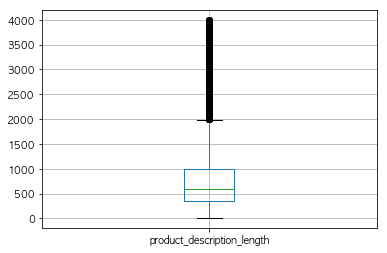

In [168]:
total[['product_description_length','pn_review_score']].boxplot()

In [173]:
[des_df, des_table, des_nprop, des_pprop, des_bins] = get_table(total[['product_description_length','pn_review_score']], 'product_description_length','pn_review_score', 5, 0,2000)

[8.0, 406.4, 804.8, 1203.1999999999998, 1601.6, 2000.0, 2398.3999999999996, 3992]
['[8 , 406]', '[406 , 804]', '[804 , 1203]', '[1203 , 1601]', '[1601 , 2000]', '[2000 , 2398]', 'high_outlier']


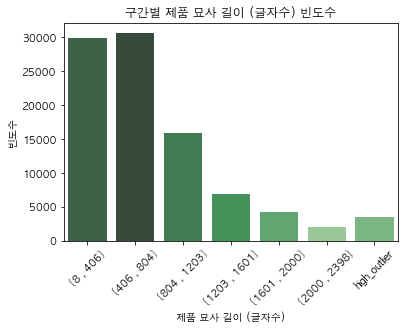

In [174]:
draw_freq(des_table, des_df, 32, 'product_description_length', '제품 묘사 길이 (글자수)')


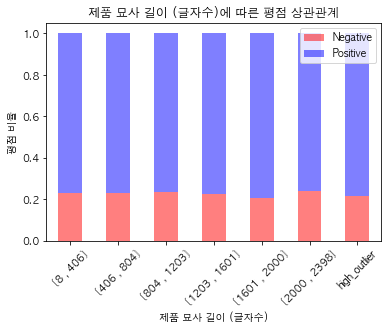

In [175]:
draw_bar_cor(des_df, 32, 'product_description_length', '제품 묘사 길이 (글자수)')

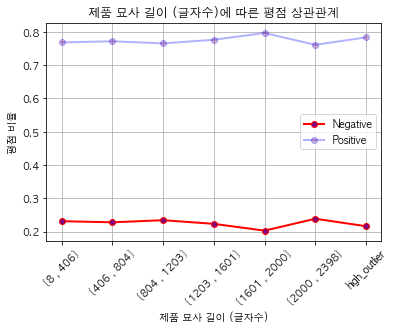

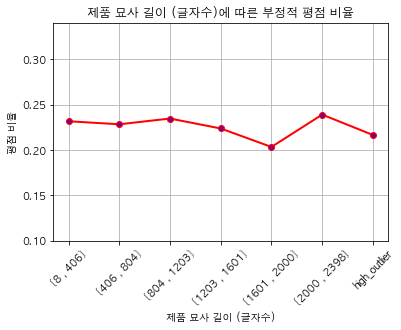

In [176]:
draw_line_cor(des_df, 32, 'product_description_length', '제품 묘사 길이 (글자수)')

# [가설33] product_photos_qty 제품 사진 개수 (개)

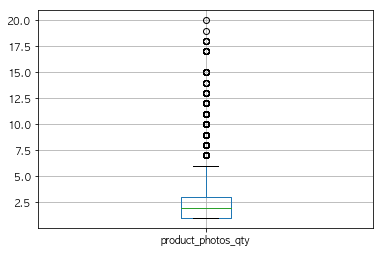

In [177]:
total[['product_photos_qty','pn_review_score' ]].boxplot()
# 제품 사진 개수 (개)
#[_df, _table, _nprop, _pprop, _bins] = get_table(df, x,y, nbins, minimum, maximum)

In [181]:
[pho_df, pho_table, pho_nprop, pho_pprop, pho_bins] = get_table(total[['product_photos_qty','pn_review_score']], 'product_photos_qty','pn_review_score', 6, 1, 7)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 20]
['[1 , 2]', '[2 , 3]', '[3 , 4]', '[4 , 5]', '[5 , 6]', '[6 , 7]', 'high_outlier']


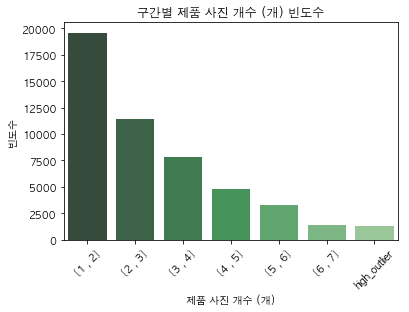

In [182]:
draw_freq(pho_table, pho_df, 33, 'product_photos_qty', '제품 사진 개수 (개)')

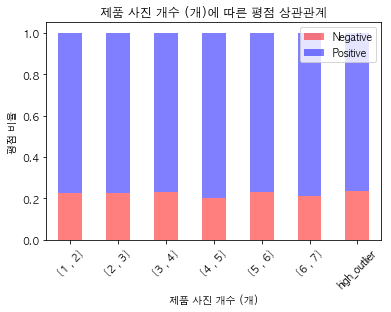

In [183]:
draw_bar_cor(pho_df, 33, 'product_photos_qty', '제품 사진 개수 (개)')

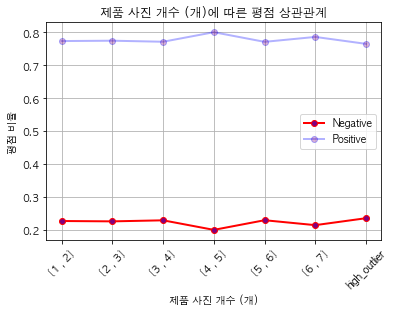

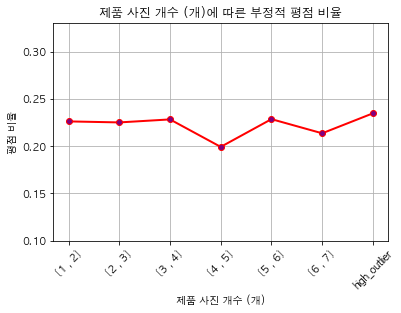

In [184]:
draw_line_cor(pho_df, 33, 'product_photos_qty', '제품 사진 개수 (개)')

# [가설34] seller_response_time 판매자 응답 속도 (일)

,seller_response_time
count,92982.000000
mean,0.423866
std,0.890373
min,0.000000
25%,0.008683
50%,0.013182
75%,0.583015
max,60.452777


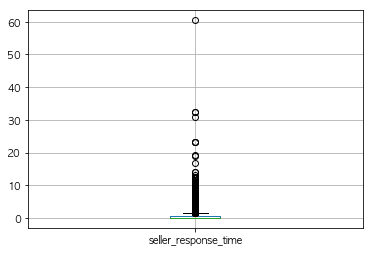

In [186]:
total[['seller_response_time','pn_review_score']].boxplot()
total[['seller_response_time','pn_review_score']].describe()
#seller_response_time 판매자 응답 속도(일)

In [219]:
#total[['seller_response_time','pn_review_score']],

[res_df, res_table, res_nprop, res_pprop, res_bins] = get_table2(total[['seller_response_time','pn_review_score']], 'seller_response_time','pn_review_score',[0,0.04,0.24,0.48,1,2,3,6])

[0, 0.04, 0.24, 0.48, 1, 2, 3, 6, 60.452776829861115]
['[0 , 0.04]', '[0.04 , 0.24]', '[0.24 , 0.48]', '[0.48 , 1]', '[1 , 2]', '[2 , 3]', '[3 , 6]', 'high_outlier']


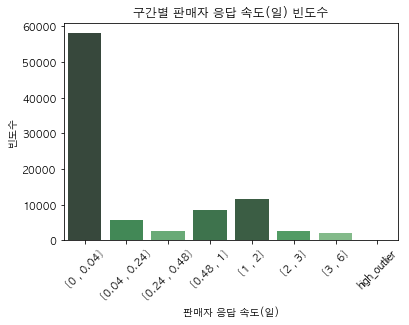

In [220]:
draw_freq(res_table, res_df, 34, 'seller_response_time', '판매자 응답 속도(일)')

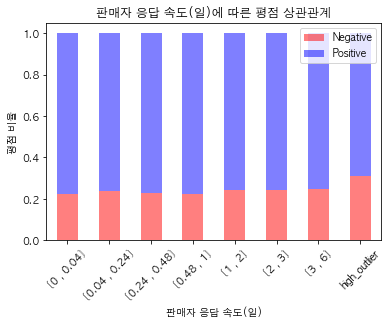

In [221]:
draw_bar_cor(res_df, 34, 'seller_response_time', '판매자 응답 속도(일)')

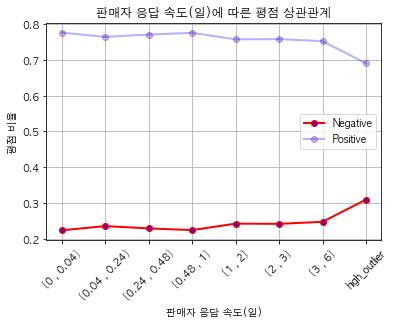

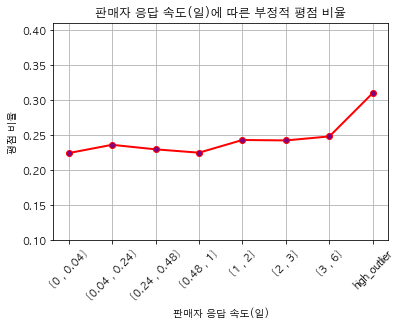

In [222]:

draw_line_cor(res_df, 34, 'seller_response_time', '판매자 응답 속도(일)')

In [223]:
res_table

,Frequency,Positive,Negative,seller_response_time
seller_response_time,,,,
"(0.0, 0.04]",58103,45077,13026,"[0 , 0.04]"
"(0.04, 0.24]",5729,4377,1352,"[0.04 , 0.24]"
"(0.24, 0.48]",2470,1903,567,"[0.24 , 0.48]"
"(0.48, 1.0]",8600,6667,1933,"[0.48 , 1]"
"(1.0, 2.0]",11689,8850,2839,"[1 , 2]"
"(2.0, 3.0]",2646,2005,641,"[2 , 3]"
"(3.0, 6.0]",1960,1474,486,"[3 , 6]"
"(6.0, 60.453]",100,69,31,high_outlier


# [가설35] review_ans_period 리뷰 응답 신속도

,review_ans_period
count,93000.000000
mean,3.342329
std,11.091966
min,0.172558
25%,1.126215
50%,1.795683
75%,3.238970
max,532.832454


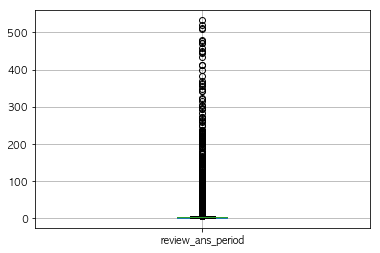

In [224]:
#review_ans_period 리뷰 응답 신속도(일)
total[['review_ans_period','pn_review_score']].boxplot()
total[['review_ans_period','pn_review_score']].describe()


In [254]:
[resan_df, resan_table, resan_nprop, resan_pprop, resan_bins] = get_table2(total[['review_ans_period','pn_review_score']], 'review_ans_period','pn_review_score',[0.1,0.48,1,2,3,7])

[0.1, 0.48, 1, 2, 3, 7, 532.8324537037037]
['[0.1 , 0.48]', '[0.48 , 1]', '[1 , 2]', '[2 , 3]', '[3 , 7]', 'high_outlier']


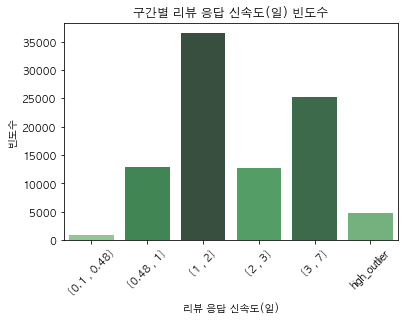

In [255]:
draw_freq(resan_table, resan_df, 35, 'review_ans_period', '리뷰 응답 신속도(일)')

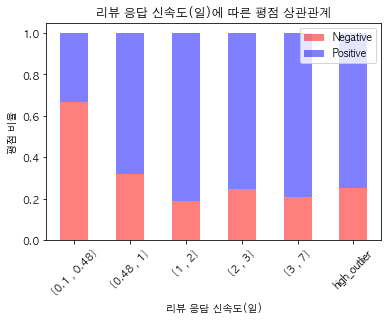

In [257]:
draw_bar_cor(resan_df, 35, 'review_ans_period', '리뷰 응답 신속도(일)')

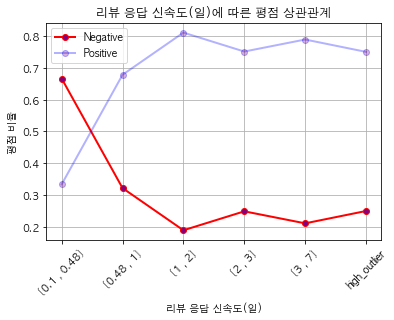

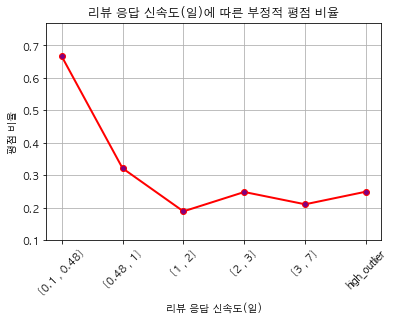

In [256]:
draw_line_cor(resan_df, 35, 'review_ans_period', '리뷰 응답 신속도(일)')

In [245]:
resan_table

,Frequency,Positive,Negative,review_ans_period
review_ans_period,,,,
"(0.1, 0.48]",879,293,586,"[0.1 , 0.48]"
"(0.48, 1.0]",12850,8718,4132,"[0.48 , 1]"
"(1.0, 2.0]",36536,29642,6894,"[1 , 2]"
"(2.0, 3.0]",12674,9526,3148,"[2 , 3]"
"(3.0, 7.0]",25226,19916,5310,"[3 , 7]"
"(7.0, 532.832]",4835,3629,1206,high_outlier


0.28351623571858087 0.5


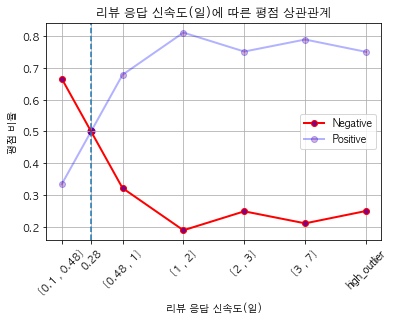

In [258]:
num1 = 0
num2 = 1

[int_x,int_y] = line_intersection(num1, num2, resan_nprop, resan_pprop, resan_bins)
print(int_x,int_y)
draw_line_int_cor(resan_df, resan_bins, num1, int_x, 35, 'review_ans_period', '리뷰 응답 신속도(일)')

# [가설36] review_comment_yn 리뷰 작성 여부

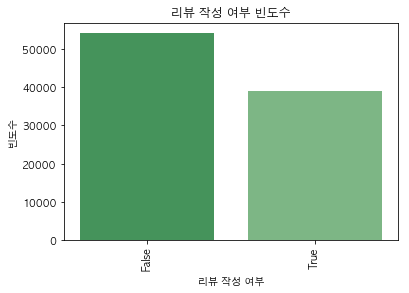

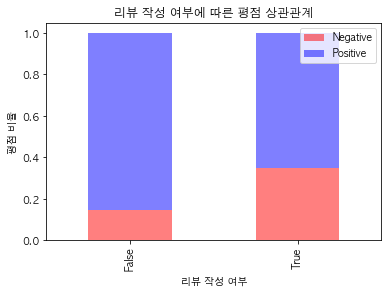

In [260]:
[reyn_freq_table, reyn_prop_table] = cat_all(total[['review_comment_yn','pn_review_score']], 'review_comment_yn','pn_review_score',36, '리뷰 작성 여부')

# [가설37] review_length 리뷰 길이

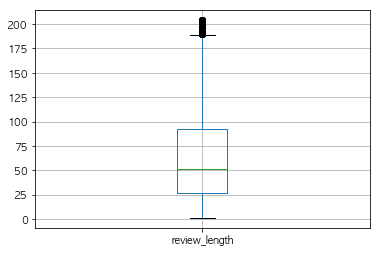

In [13]:
total[['review_length','pn_review_score']].boxplot()


In [14]:
import numpy as np
[len_df, len_table, len_nprop, len_pprop, len_bins] = get_table(total[['review_length','pn_review_score']], 'review_length','pn_review_score',6, 0, 150)

[1.0, 25.833, 50.666, 75.499, 100.332, 125.16499999999999, 149.998, 174.831, 204.0]
['[1 , 25]', '[25 , 50]', '[50 , 75]', '[75 , 100]', '[100 , 125]', '[125 , 149]', '[149 , 174]', 'high_outlier']


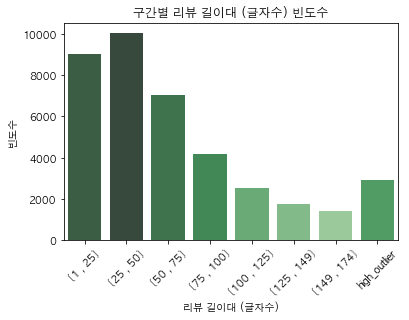

In [15]:
draw_freq(len_table, len_df,37,'review_length','리뷰 길이대 (글자수)')

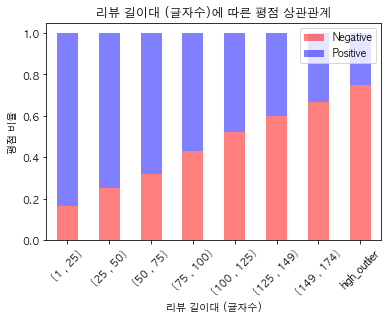

In [16]:
draw_bar_cor(len_df,37,'review_length','리뷰 길이대 (글자수)')

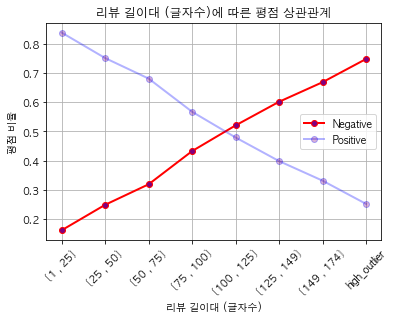

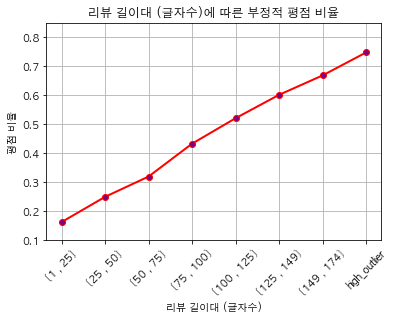

In [17]:
draw_line_cor(len_df,37,'review_length','리뷰 길이대 (글자수)')

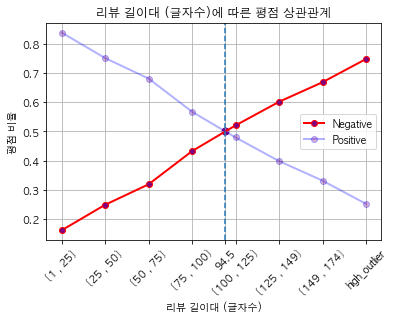

In [18]:
num1 = 3
num2 = 4
[int_x,int_y] = line_intersection(num1, num2, len_nprop, len_pprop, len_bins)
draw_line_int_cor(len_df, len_bins, num1, int_x, 37,'review_length','리뷰 길이대 (글자수)')


# [가설38] customer_city 고객 거주 도시

In [3]:
#customer_city 고객 거주 도시
cusstate = total[['customer_state','pn_review_score']]

In [10]:
cusstate['customer_state'].value_counts()/93000

sp    0.408742
rj    0.134849
mg    0.119763
rs    0.055925
pr    0.050699
sc    0.037742
ba    0.034957
es    0.020473
df    0.020280
go    0.020022
pe    0.016538
ce    0.013624
pa    0.010355
mt    0.009065
ma    0.007710
ms    0.007032
pb    0.005570
rn    0.005226
pi    0.004645
al    0.004333
se    0.003505
ro    0.002753
to    0.002699
am    0.001430
ac    0.000903
ap    0.000688
rr    0.000473
Name: customer_state, dtype: float64

In [11]:
cusstate['customer_state'].value_counts()

sp    38013
rj    12541
mg    11138
rs     5201
pr     4715
sc     3510
ba     3251
es     1904
df     1886
go     1862
pe     1538
ce     1267
pa      963
mt      843
ma      717
ms      654
pb      518
rn      486
pi      432
al      403
se      326
ro      256
to      251
am      133
ac       84
ap       64
rr       44
Name: customer_state, dtype: int64

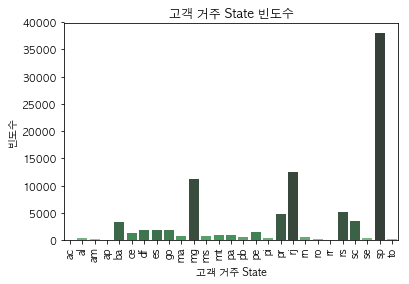

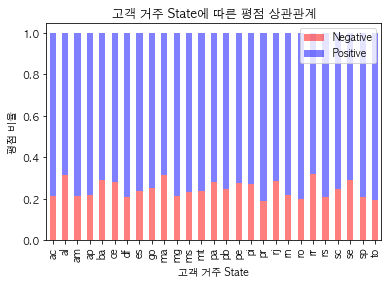

In [26]:
[cusstate_freq_table, cusstate_prop_table] = cat_all(cusstate, 'customer_state', 'pn_review_score', 38, '고객 거주 State')


# [가설39] seller state

In [12]:
selstate = total[['seller_state','pn_review_score']]

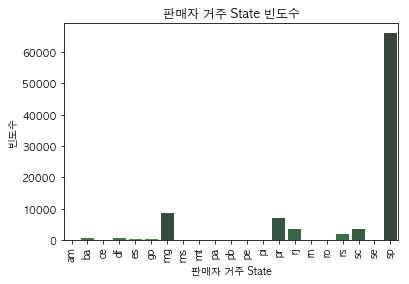

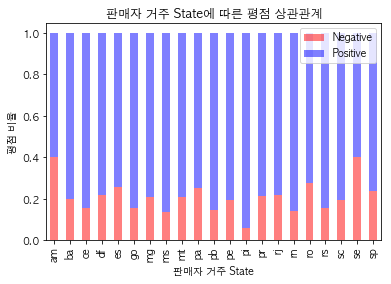

In [28]:
[selstate_freq_table, selstate_prop_table] = cat_all(selstate, 'seller_state', 'pn_review_score', 39, '판매자 거주 State')

In [13]:
selstate['seller_state'].value_counts()

sp    66052
mg     8569
pr     7163
sc     3413
rj     3378
rs     1880
df      779
ba      536
go      400
es      299
mt      139
pe      109
rn       72
ce       64
ms       45
pb       28
ro       18
pi       17
pa       12
am        5
se        5
Name: seller_state, dtype: int64

In [15]:
selstate['seller_state'].value_counts()/93000

sp    0.710237
mg    0.092140
pr    0.077022
sc    0.036699
rj    0.036323
rs    0.020215
df    0.008376
ba    0.005763
go    0.004301
es    0.003215
mt    0.001495
pe    0.001172
rn    0.000774
ce    0.000688
ms    0.000484
pb    0.000301
ro    0.000194
pi    0.000183
pa    0.000129
am    0.000054
se    0.000054
Name: seller_state, dtype: float64

# [루트별 배송 전략] seller_state * customer_state

In [7]:
total['state_comb'] = total['seller_state']+' , ' + total['customer_state']

In [8]:
state = total[['state_comb','pn_review_score']]

In [9]:

freq_table = pd.crosstab(index = state.state_comb, columns = state.pn_review_score, margins=True).apply(lambda x : x , axis = 1)
state_table = pd.crosstab(index = state.state_comb, columns = state.pn_review_score, margins=True).apply(lambda x : x/x['All'] , axis = 1)

In [10]:
freq = state_table.iloc[:-1,:-1].T

In [11]:
df = state_table.iloc[:-1,:-1].sort_values('Negative',ascending=False)
y_ratio = sum(total['pn_review_score'] == 'Positive') / len(total)

df2 = df.merge(freq_table, on ='state_comb').sort_values('Negative_x',ascending=False)

In [12]:
df2['All'].describe()

count      386.000000
mean       240.888601
std       1620.305795
min          1.000000
25%          2.000000
50%         10.000000
75%         47.500000
max      28990.000000
Name: All, dtype: float64

In [13]:

df2.head()

pn_review_score,Negative_x,Positive_x,Negative_y,Positive_y,All
state_comb,,,,,
"mt , ms",1.0,0.0,2,0,2
"se , pa",1.0,0.0,1,0,1
"se , pr",1.0,0.0,1,0,1
"am , se",1.0,0.0,1,0,1
"am , sp",1.0,0.0,1,0,1


In [14]:
len(df2)

386

In [28]:
cut_df = df2[df2['All']> 10][['Negative_x','Positive_x']]
cut_df.columns=['Negative','Positive']

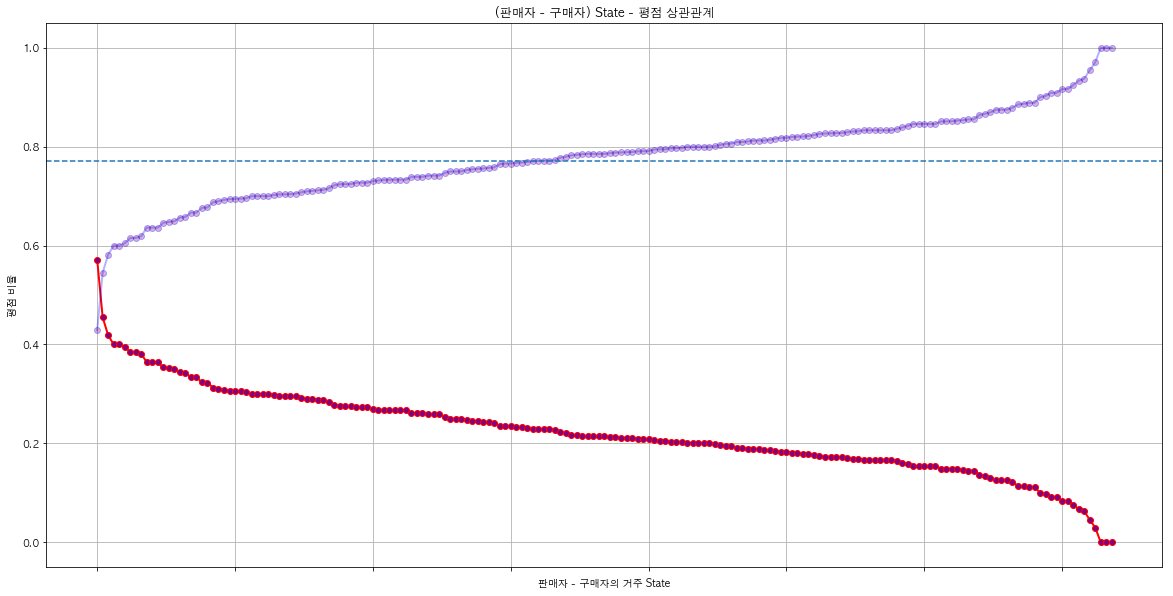

In [29]:
import matplotlib.ticker as ticker

plt.figure(figsize=(20,10))
ax2 = cut_df['Negative'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='red', linewidth=2)
ax2 = cut_df['Positive'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='blue', linewidth=2, alpha=0.3)
ax2.axhline(y=y_ratio, ls= '--')
#ax2.scatter(num1-abs(int_x)/6 ,int_y, marker= 'o', c='purple', s=100)
ax2.grid(True)
#ax2.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

#ax2.set_xticks([0,2,4,int_x/5,6,8,10])
#ax2.set_yticks()

#ax2.set_xticklabels(labels2,rotation = 45)

plt.title('(판매자 - 구매자) State - 평점 상관관계')
plt.xlabel('판매자 - 구매자의 거주 State')
plt.ylabel('평점 비율')
plt.savefig('./상관관계/0.(판매자 - 구매자) State - 평점 상관관계 평점 상관관계_전체.png', bbox_inches='tight')
#plt.savefig('./상관관계/확정/1. 절대적 배송 기간에 따른 평점 상관관계_꺾은선_교차점표시.png', bbox_inches='tight')

In [30]:
cut_df2 = cut_df[cut_df['Positive'] < y_ratio]

In [31]:
cut_df2.sort_values('Negative',ascending=False)
merged = cut_df2.merge(df2,on='state_comb')

In [87]:
cut_df2.columns

Index(['Negative', 'Positive'], dtype='object')

In [89]:
merged.sort_values('All',ascending=False)

,Negative,Positive,Negative_x,Positive_x,Negative_y,Positive_y,All
state_comb,,,,,,,
"sp , rj",0.306067,0.693933,0.306067,0.693933,2578,5845,8423
"sp , rs",0.229281,0.770719,0.229281,0.770719,794,2669,3463
"sp , ba",0.295923,0.704077,0.295923,0.704077,675,1606,2281
"sp , sc",0.269485,0.730515,0.269485,0.730515,612,1659,2271
"sp , go",0.267108,0.732892,0.267108,0.732892,363,996,1359
"sp , es",0.260902,0.739098,0.260902,0.739098,353,1000,1353
"mg , rj",0.241641,0.758359,0.241641,0.758359,318,998,1316
"sp , pe",0.287138,0.712862,0.287138,0.712862,317,787,1104
"rj , sp",0.245747,0.754253,0.245747,0.754253,260,798,1058


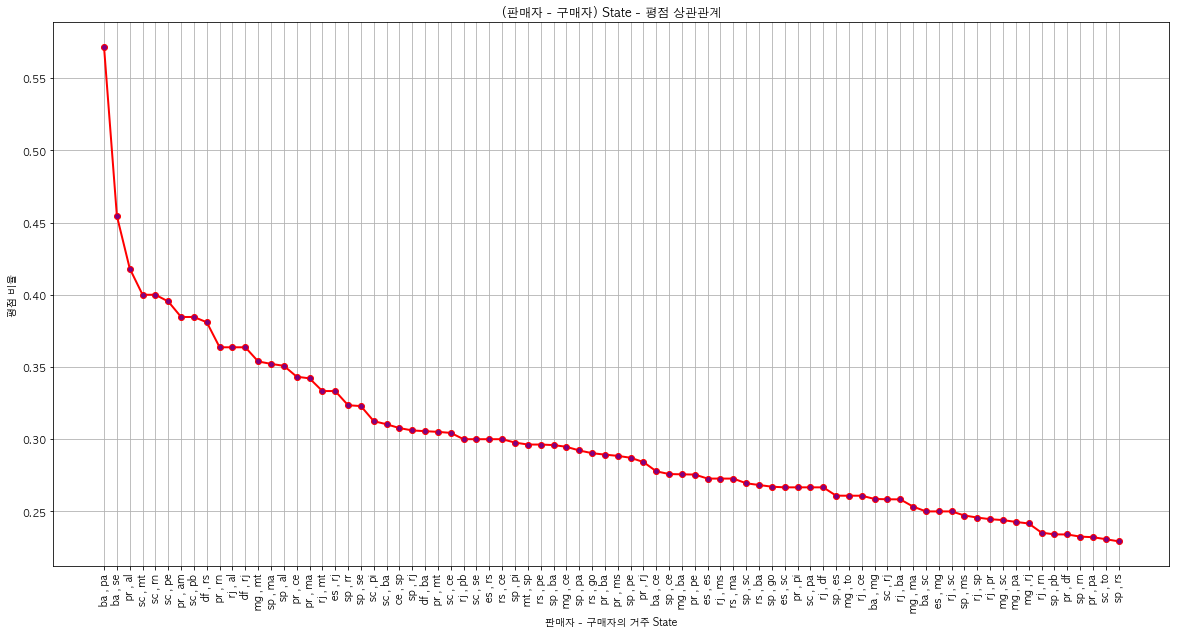

In [32]:
import matplotlib.ticker as ticker

plt.figure(figsize=(20,10))
ax2 = cut_df2['Negative'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='red', linewidth=2)
#ax2 = cut_df2['Positive'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='blue', linewidth=2, alpha=0.3)

#ax2.axhline(y=y_ratio, ls= '--')
#ax2.scatter(num1-abs(int_x)/6 ,int_y, marker= 'o', c='purple', s=100)
ax2.grid(True)
ax2.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

#ax2.set_xticks(cut_df2.index)
#ax2.set_yticks()
ax2.set_xticklabels(cut_df2.index,rotation=90)

plt.title('(판매자 - 구매자) State - 평점 상관관계')
plt.xlabel('판매자 - 구매자의 거주 State')
plt.ylabel('평점 비율')
plt.savefig('./상관관계/0.(판매자 - 구매자) State - 평점 상관관계.png', bbox_inches='tight')

In [467]:
countlist = cut_df2.index.tolist()

In [468]:
len(countlist)

10

## [state-state 네트워크 생성]

In [3]:
sel = []
cus = []
for i in countlist:
    x, y = i.split(' , ')
    sel.append(x)
    cus.append(y)

NameError: name 'countlist' is not defined

In [470]:
pd.DataFrame(sel)[0].value_counts()

sc    4
pr    3
ba    2
df    1
Name: 0, dtype: int64

In [461]:
pd.DataFrame(cus)[0].value_counts()

ce    7
ba    7
rj    6
pa    5
sc    5
pe    4
mt    4
rn    4
ma    4
se    3
ms    3
pb    3
rs    3
al    3
sp    3
pi    3
es    2
to    2
df    2
go    2
mg    2
pr    1
rr    1
am    1
Name: 0, dtype: int64

In [4]:

cusstate = total['customer_state'].unique()
selstate = total['seller_state'].unique()
node1 = []
node2 = []
wgt = []
ngt = []
ngt_ratio = []
for cus in cusstate:
    for sel in selstate:
        node1.append(cus)
        node2.append(sel)
        freq = len(total.query('(customer_state == "%s")'%cus + "&" + '(seller_state == "%s")'%sel))
        ngt_freq = len(total.query('(customer_state == "%s")'%cus + "&" + '(seller_state == "%s")'%sel+
                                   "&" + '(pn_review_score == "%s")'%'Negative'))
        
        wgt.append(freq)
        ngt.append(ngt_freq)
        if freq==0:
            ngt_ratio.append(0)
        else:
            ngt_ratio.append(ngt_freq/freq)
        

In [5]:
state_cor = pd.DataFrame({'customer_state':node1, 'seller_state':node2,'frequency':wgt,'negative_freq':ngt, 'negative_ratio':ngt_ratio})

In [62]:
state_cor.head()

,customer_state,seller_state,frequency,negative_freq,negative_ratio
0,pr,pr,718,105,0.146240
1,pr,sp,2972,603,0.202894
2,pr,rs,143,22,0.153846
3,pr,mg,397,67,0.168766
4,pr,rj,139,34,0.244604


In [23]:
#len(state_cor[state_cor['frequency']!= 0 ])

386

In [6]:
state_cor.fillna('nan',inplace=True)

In [7]:
node_list = list(set().union(state_cor['customer_state'],state_cor['seller_state']))

In [21]:
len(node_list)

28

In [8]:
edge_list = [(node1,node2,ratio) for node1, node2,ratio in zip(state_cor['seller_state'],state_cor['customer_state'],state_cor['negative_ratio'])]

In [74]:
len(edge_list)

594

In [66]:
import networkx as nx
WG = nx.DiGraph()

WG.add_nodes_from(node_list)
WG.add_weighted_edges_from(edge_list)

WG.number_of_edges()


594

In [67]:
len(state_cor)

594

In [68]:
nx.write_graphml(WG, "state_graph.graphml")

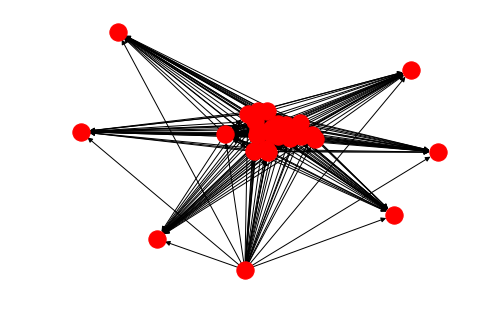

In [70]:
nx.draw(WG)
plt.show()